In [1]:
"""Jupyter Notebook for relaxation time analysis"""
#The main analysis parts adapted from script by  H. Antila, with help from S. Ollila and T. Ferreira
#saved in relaxation_times.py
# Last modified by R. Nencini, 19.10.2021
import yaml
import sys
import numpy as np
from scipy import optimize
sys.path.insert(1, '/home/ricky/Documents/from_work/git/NMR_FF_tools/relaxation_times/')
sys.path.insert(1, '/home/nenciric/Documents/git/NMR_FF_tools/relaxation_times/')

import relaxation_times as rt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
#from numba import jit #

#gyromagnetic ratios for further developmant
# !!! NOTICE!!!
#values taken from matlab code and projecct work and slightly different than those in Wikipedia
#these values are also in the external file --> if change is needed; has to be changed there
#values here in jupyter just for the information and verify, why they are different
#!!! NOTICE END !!!
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

/home/nenciric/Documents/git/NMR_FF_tools/relaxation_times/relaxation_times.py:162: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if line is "":


In [2]:

begin=0
end=100000
RM_avail=False

atom1="C1"
atom2="H11"

atom1="C3"
atom2="H31"

moleculeType="Protein"

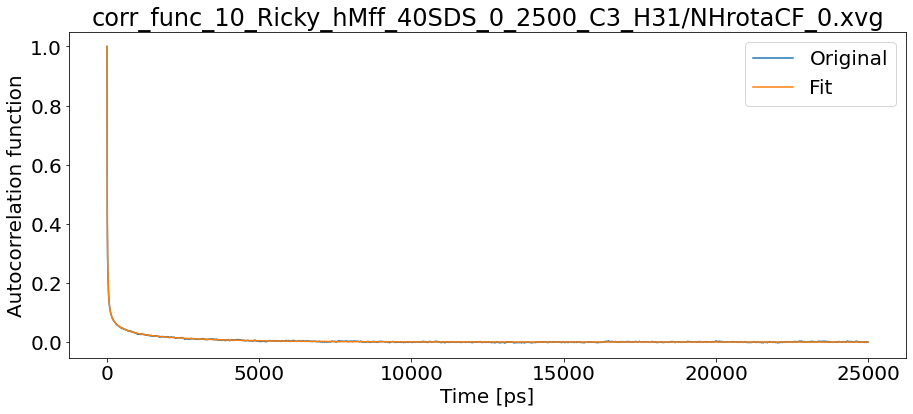

T1: 0.021535780544623077 T2: 0.016630782235846957 NOE: 0


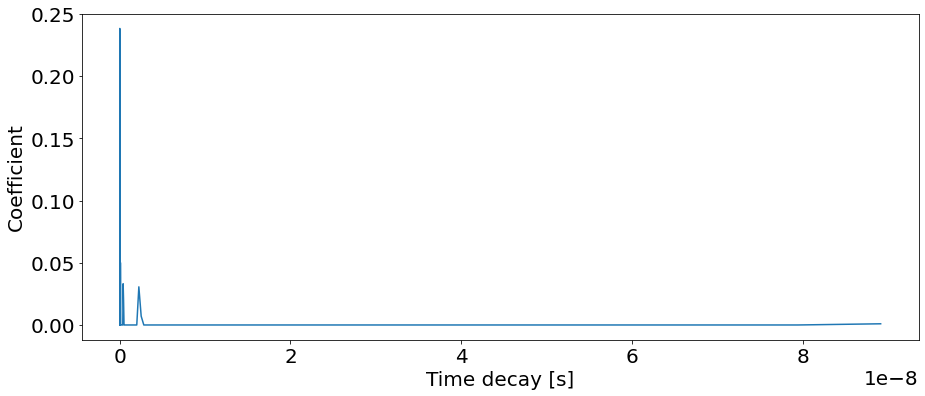

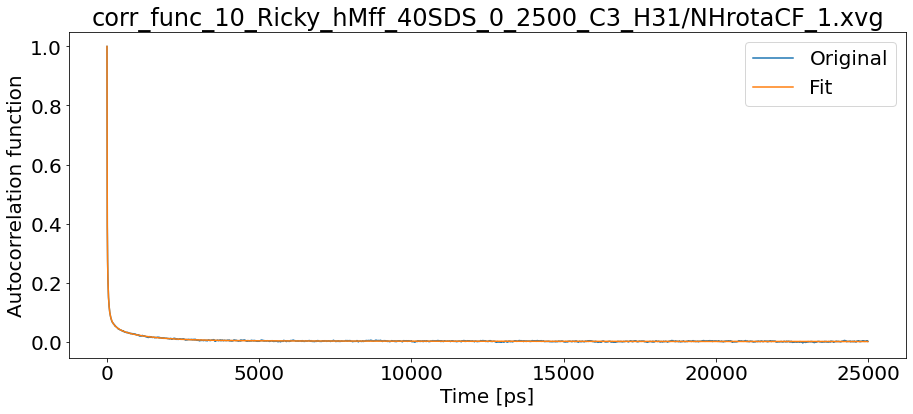

T1: 0.029925631045787732 T2: 0.025336970723038723 NOE: 0


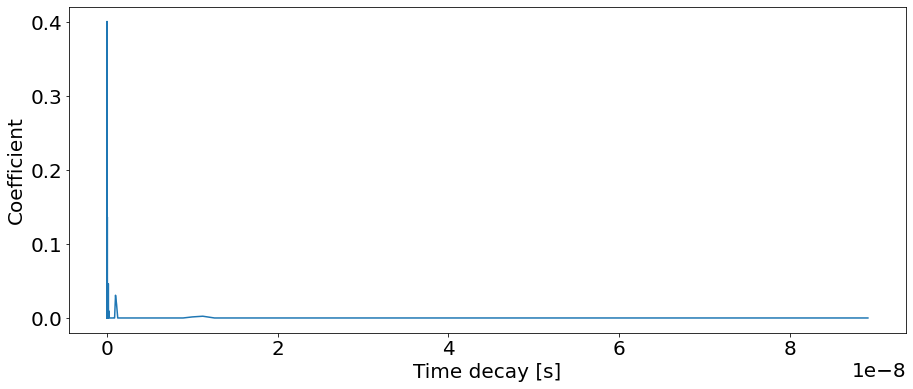

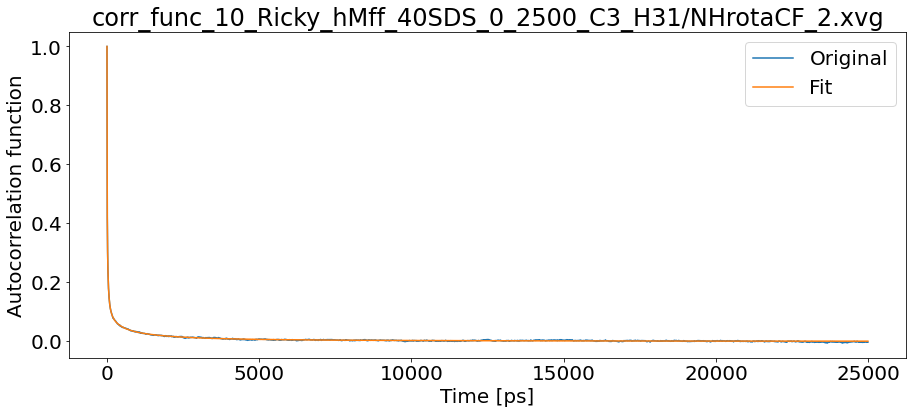

T1: 0.020913243077182283 T2: 0.017300035650840272 NOE: 0


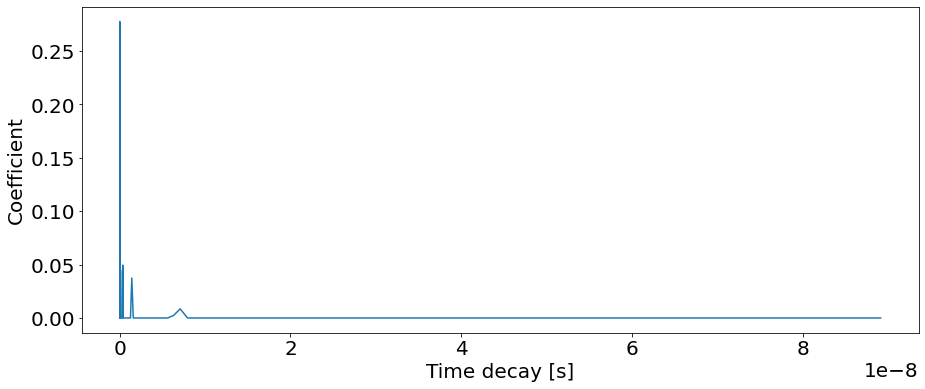

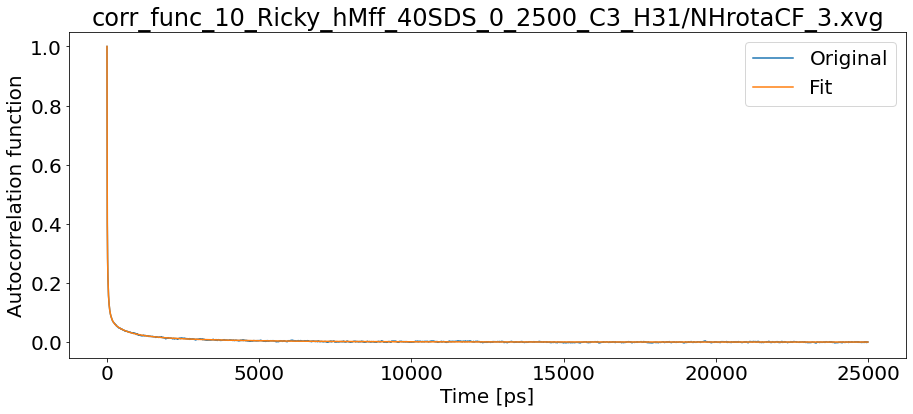

T1: 0.023752226230681458 T2: 0.021691640976954762 NOE: 0


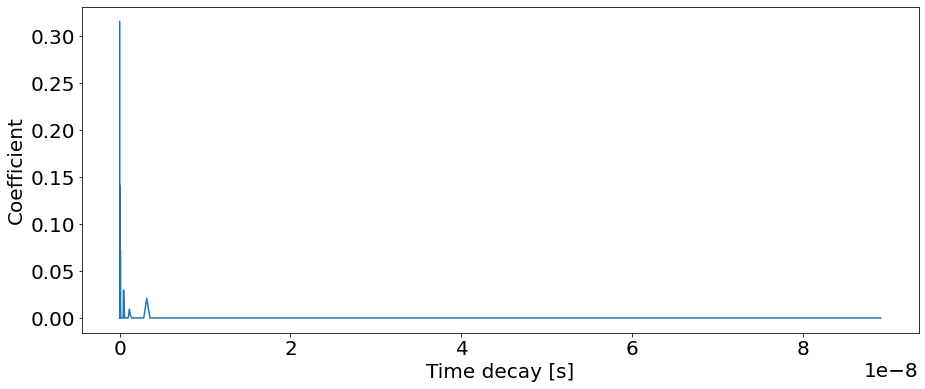

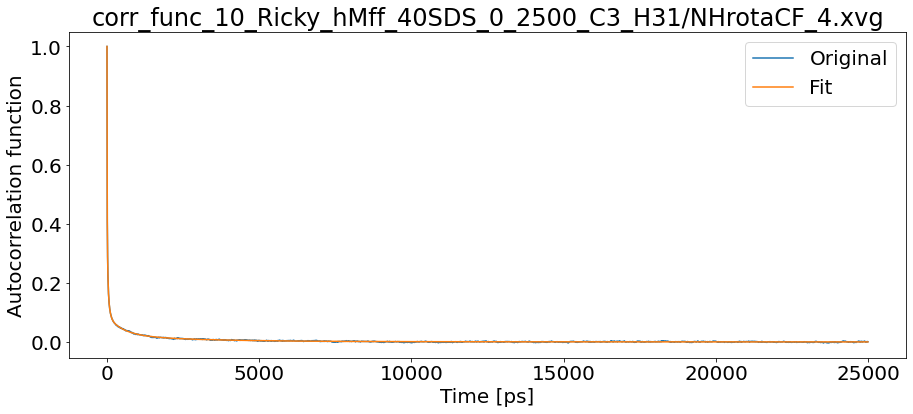

T1: 0.023779572803810007 T2: 0.017057522240391462 NOE: 0


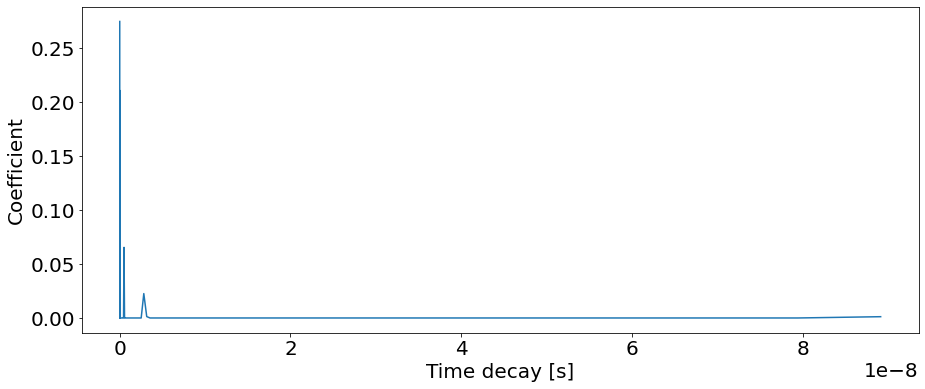

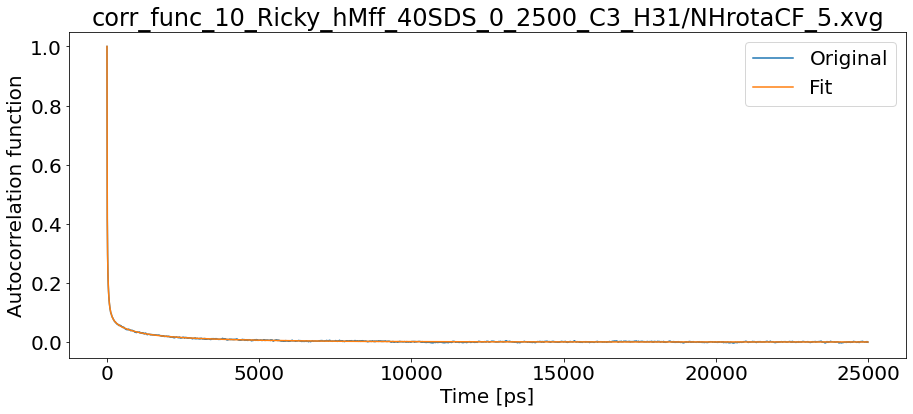

T1: 0.019594571278872958 T2: 0.01730517408028669 NOE: 0


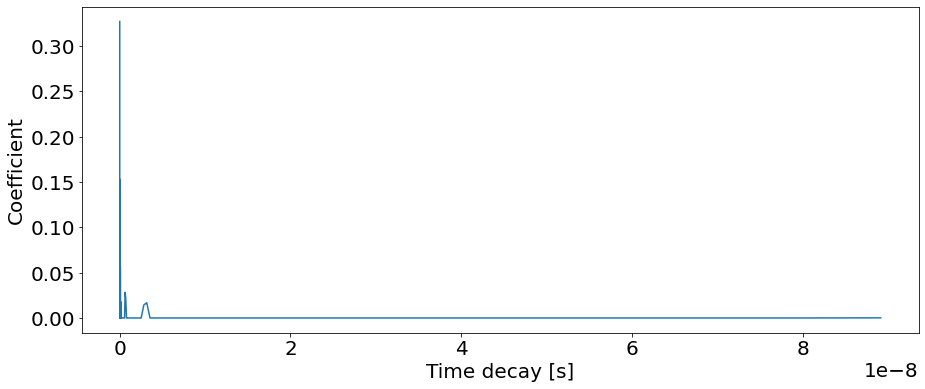

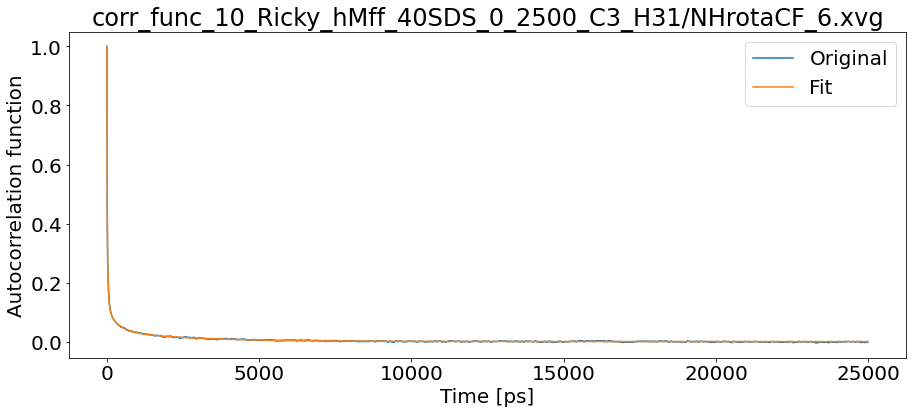

T1: 0.020660531290587838 T2: 0.019056504124356773 NOE: 0


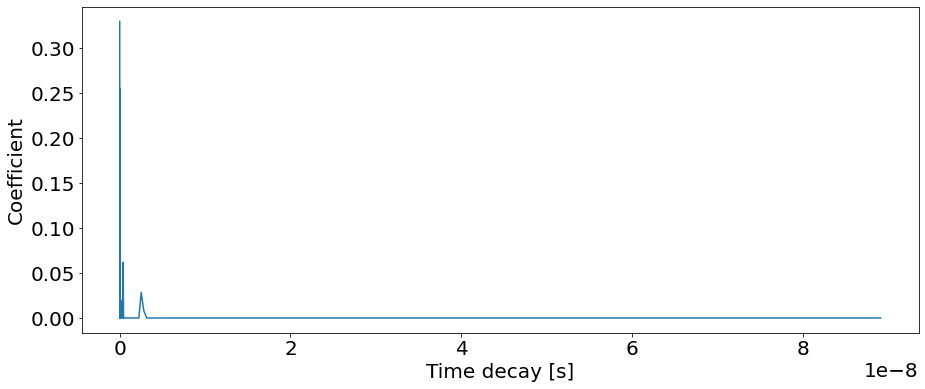

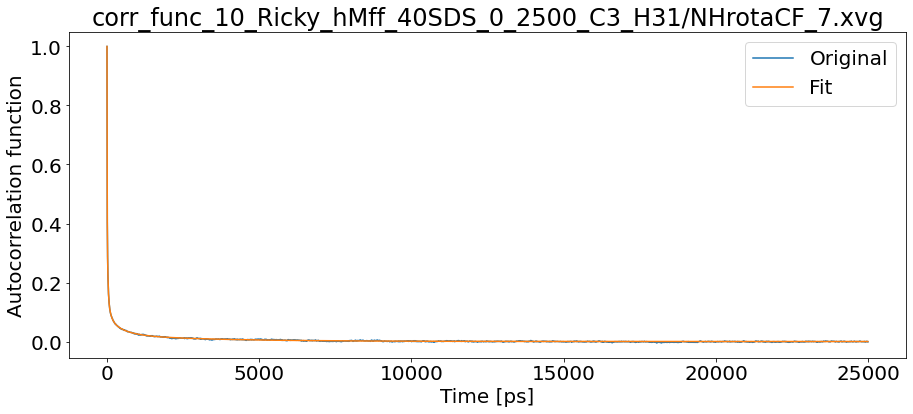

T1: 0.02322767406984952 T2: 0.020873416958775717 NOE: 0


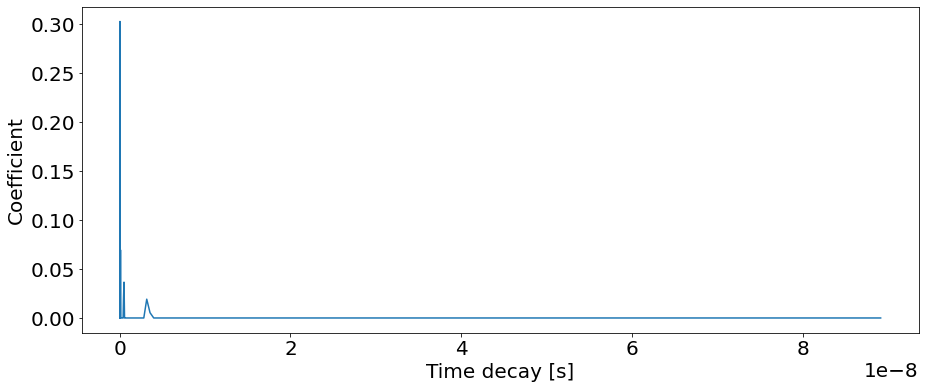

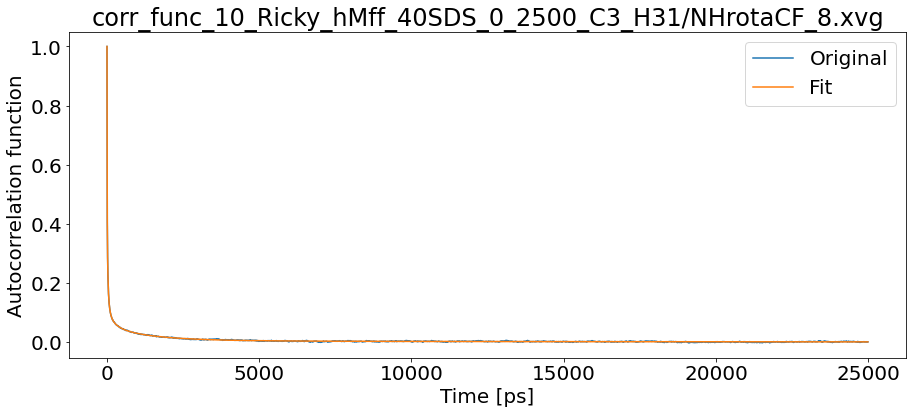

T1: 0.02376504334480216 T2: 0.019046875348391726 NOE: 0


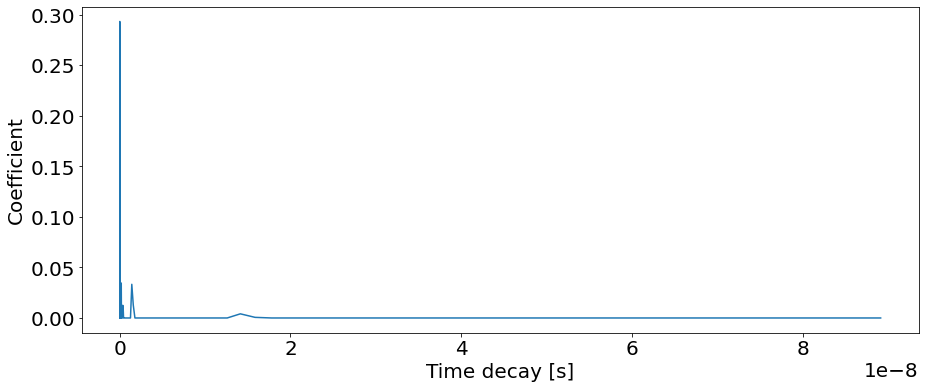

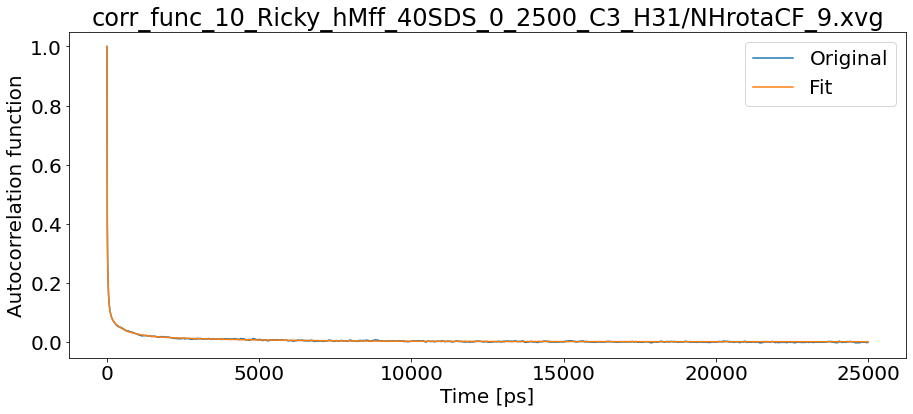

T1: 0.02266312210844121 T2: 0.019818919106500292 NOE: 0


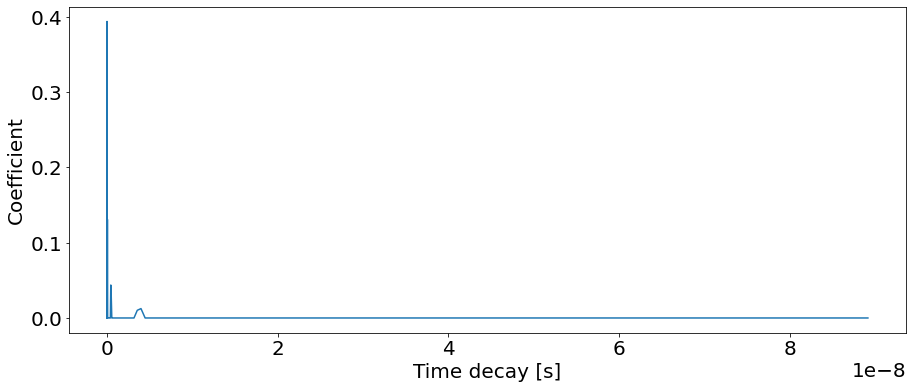

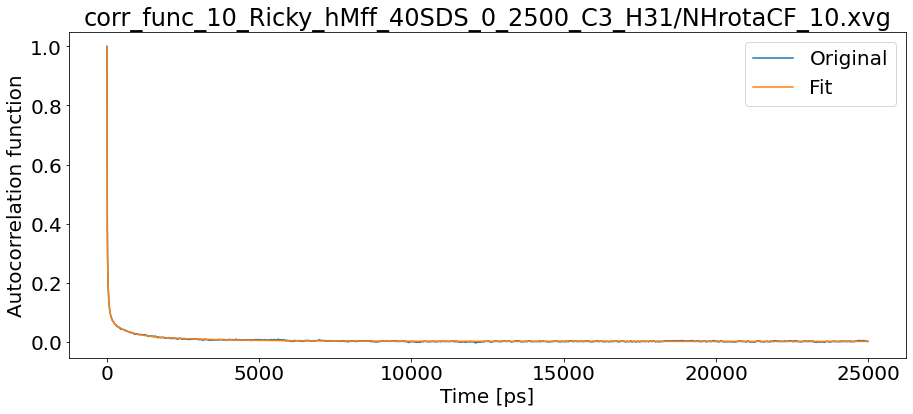

T1: 0.025209546204796006 T2: 0.020747383387523827 NOE: 0


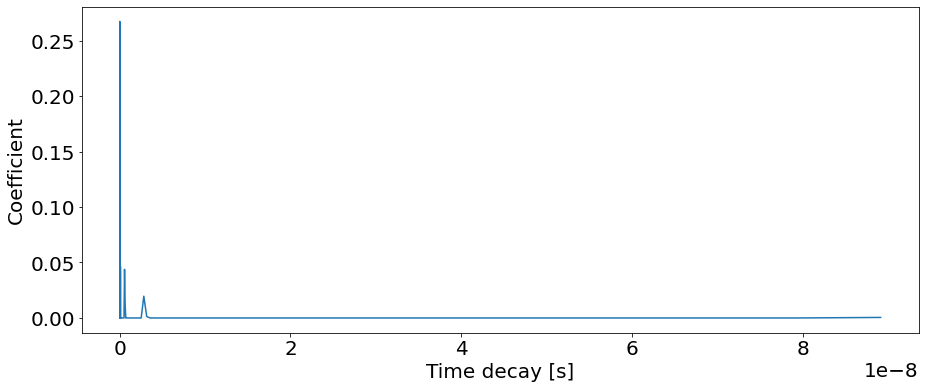

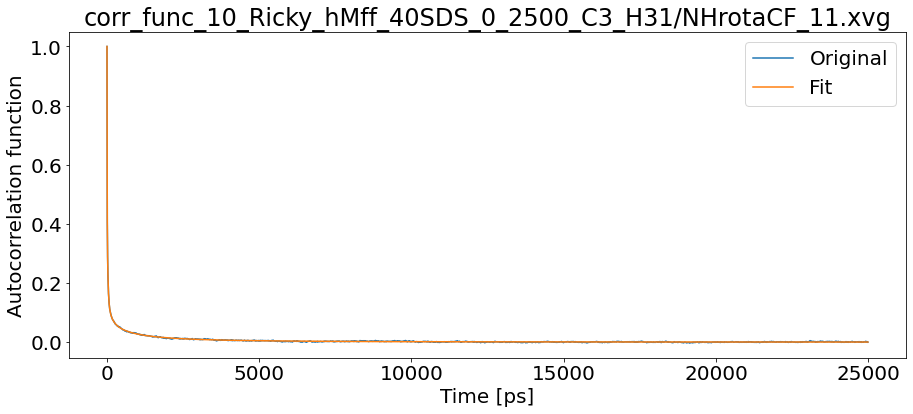

T1: 0.0233545375973117 T2: 0.018669304482141325 NOE: 0


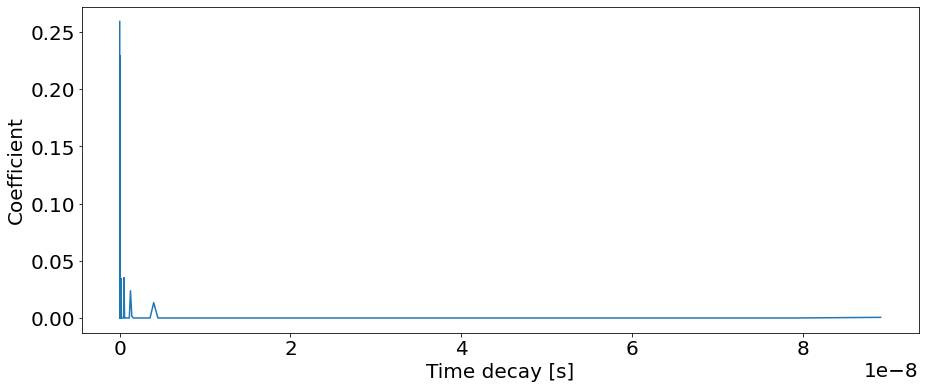

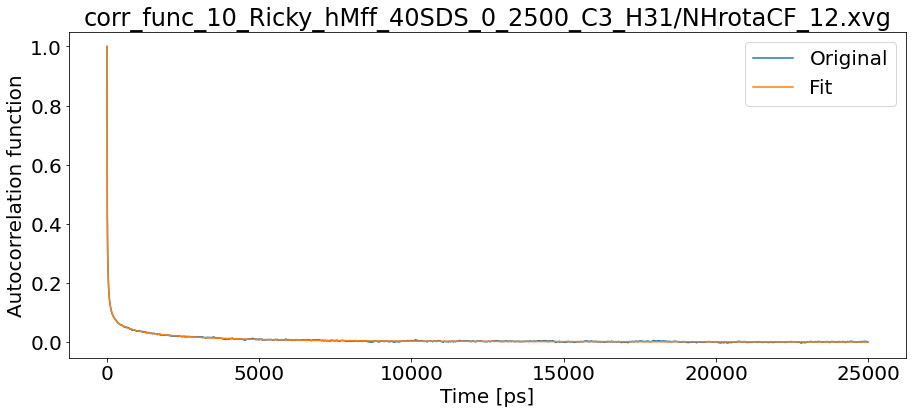

T1: 0.01745432213182672 T2: 0.013316508824275918 NOE: 0


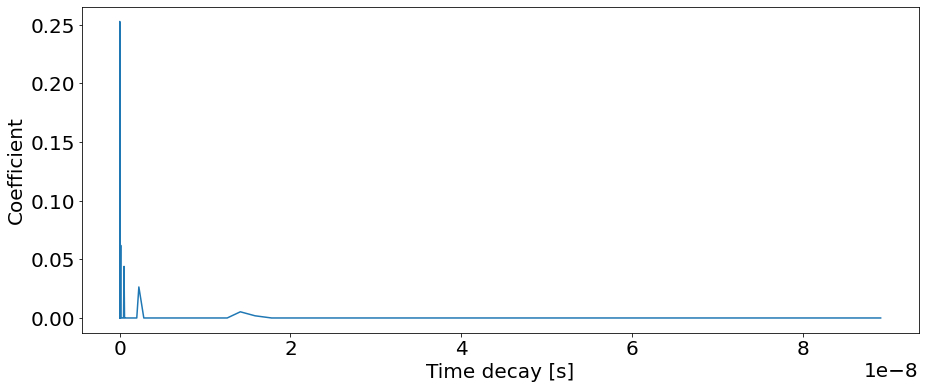

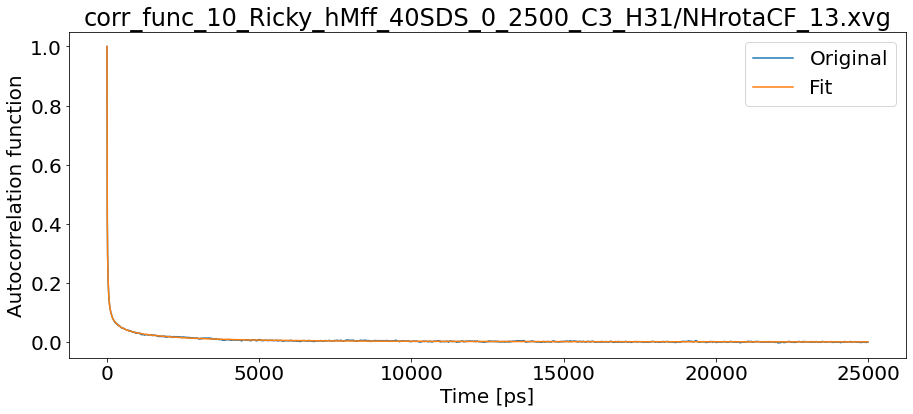

T1: 0.020934631709722207 T2: 0.017902894618443087 NOE: 0


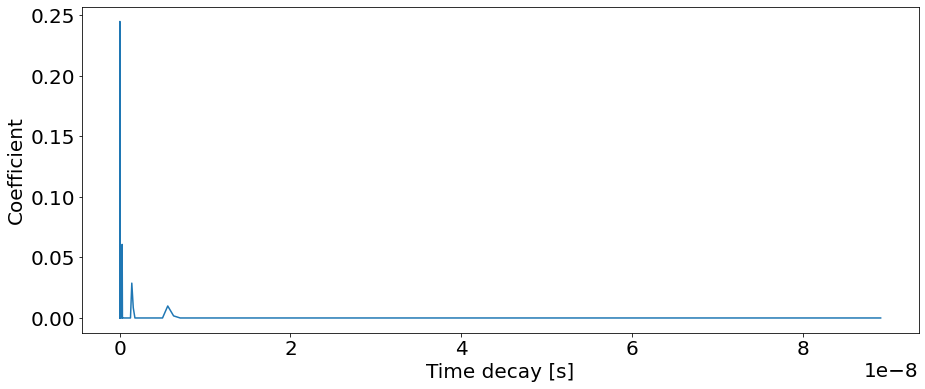

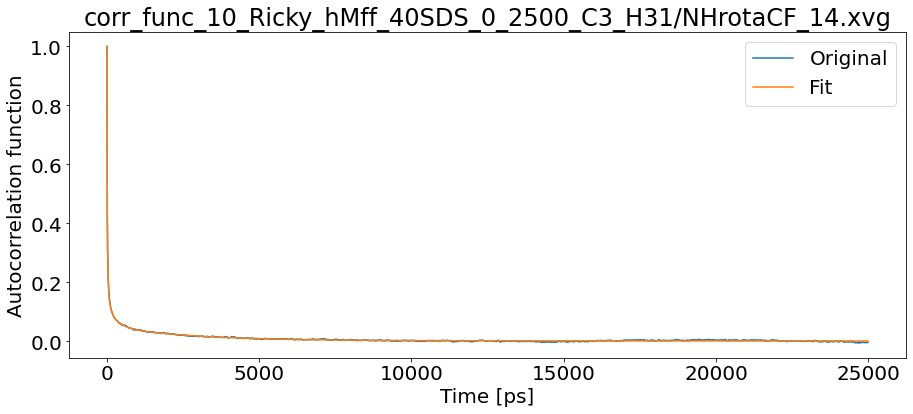

T1: 0.016641402469332413 T2: 0.011173427465065779 NOE: 0


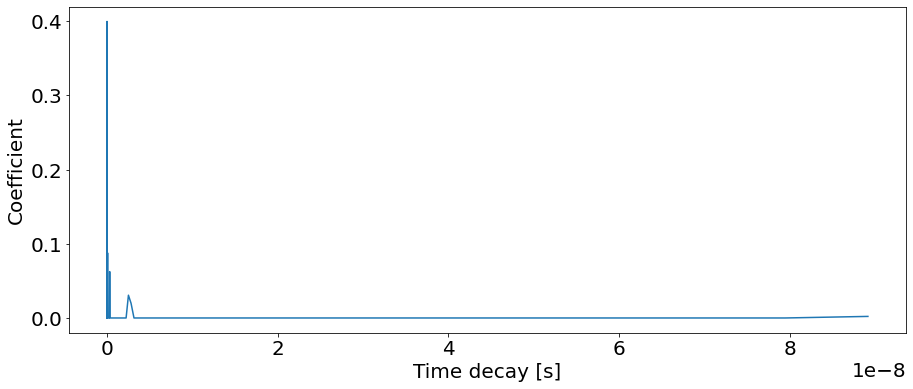

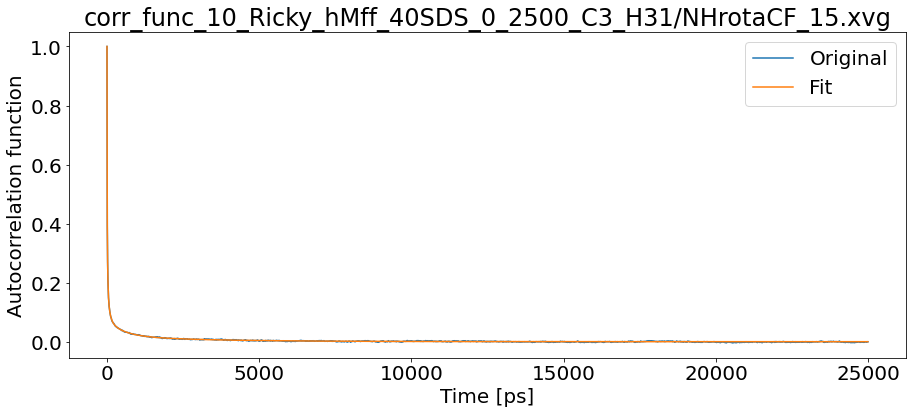

T1: 0.02626201876316893 T2: 0.024039345651363737 NOE: 0


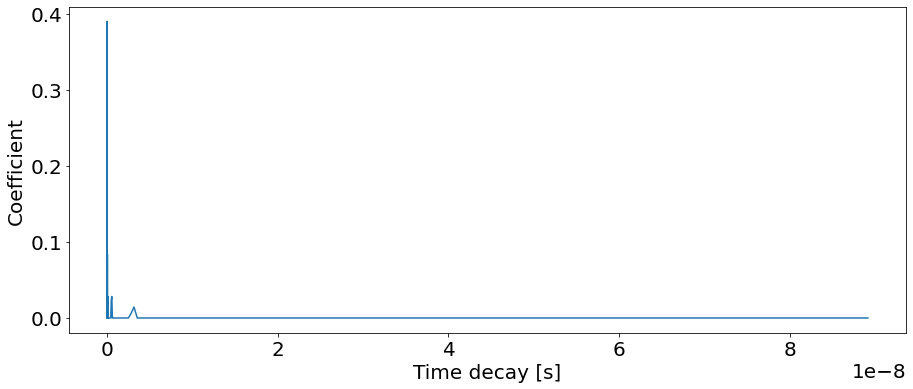

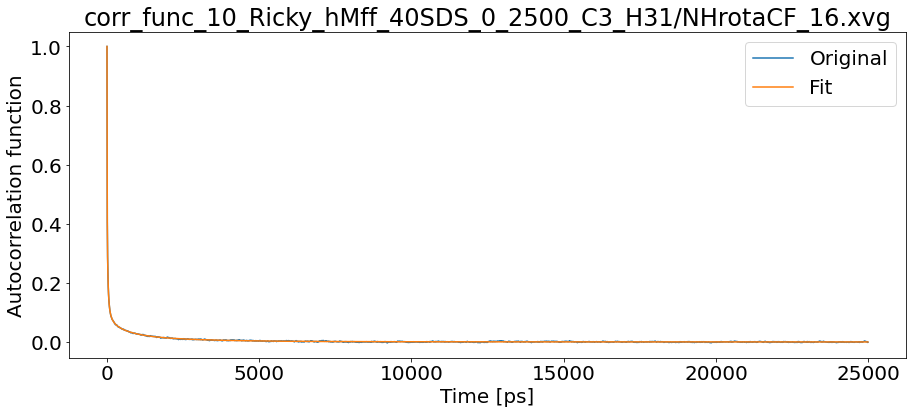

T1: 0.024083209881332744 T2: 0.02177756344812034 NOE: 0


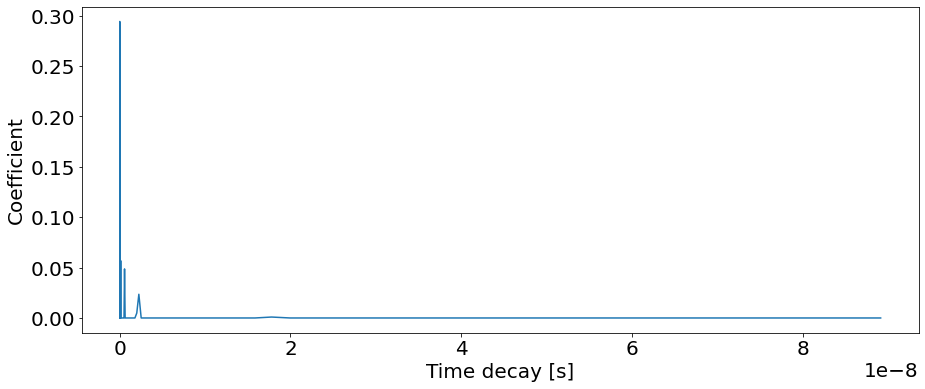

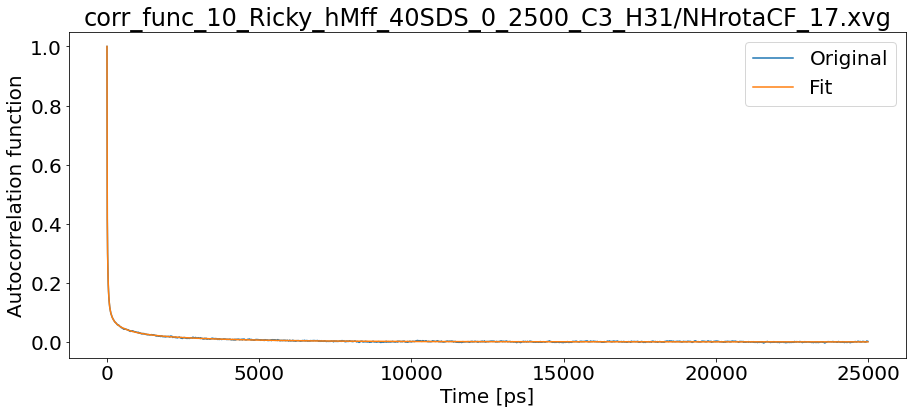

T1: 0.020272639384970224 T2: 0.016624991500043457 NOE: 0


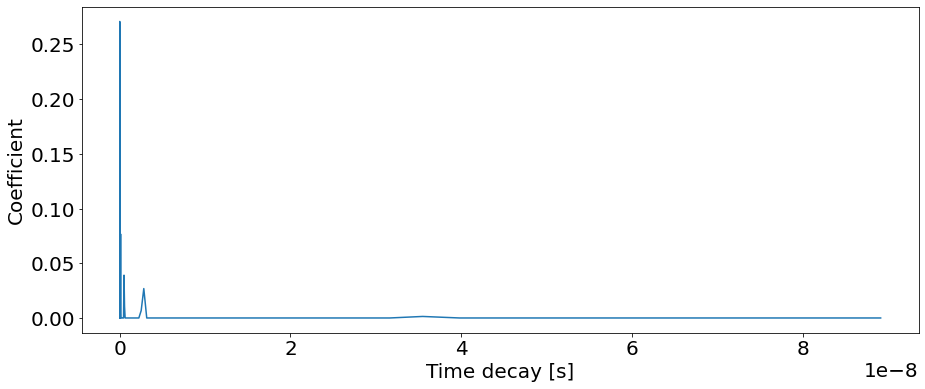

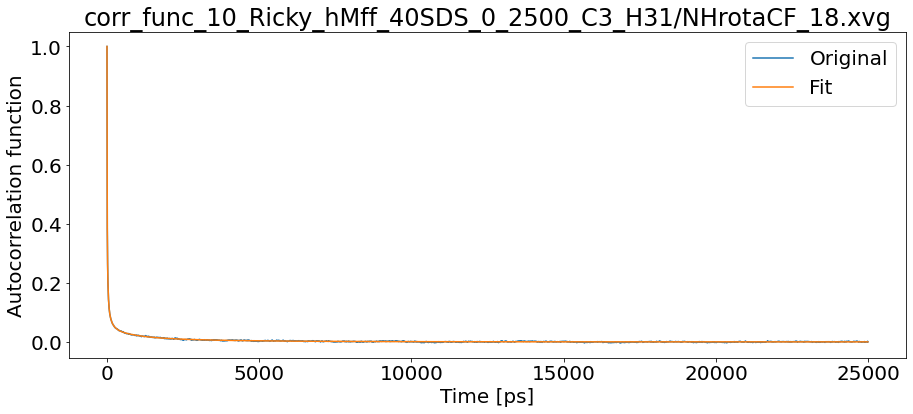

T1: 0.02806553602383242 T2: 0.025644628848473988 NOE: 0


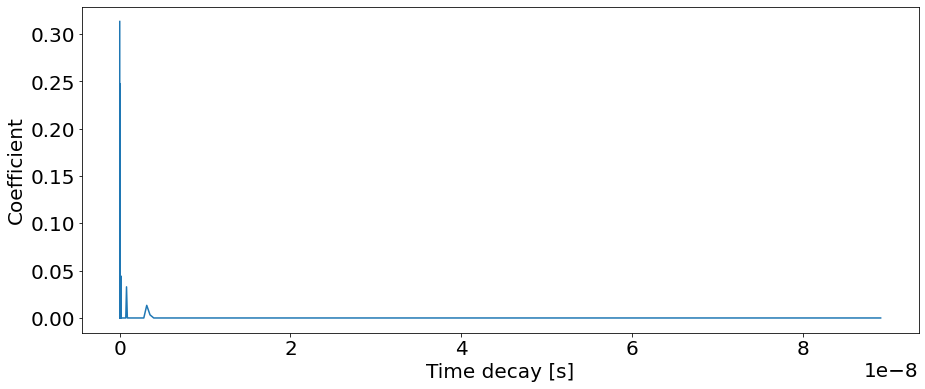

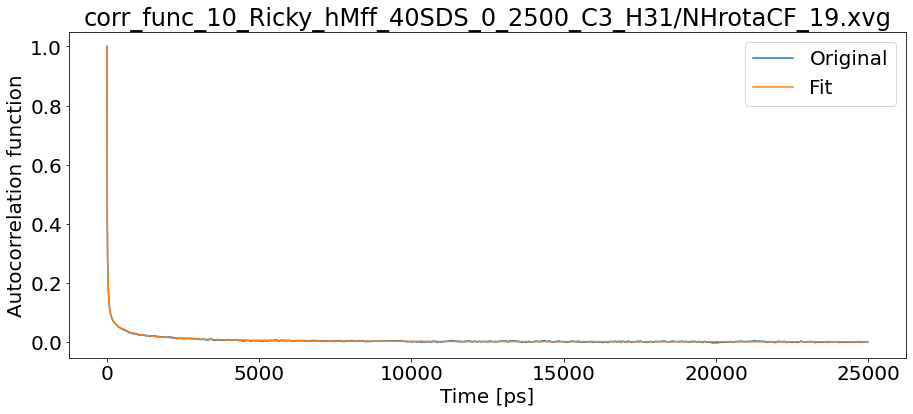

T1: 0.023877350043339417 T2: 0.0210696244208524 NOE: 0


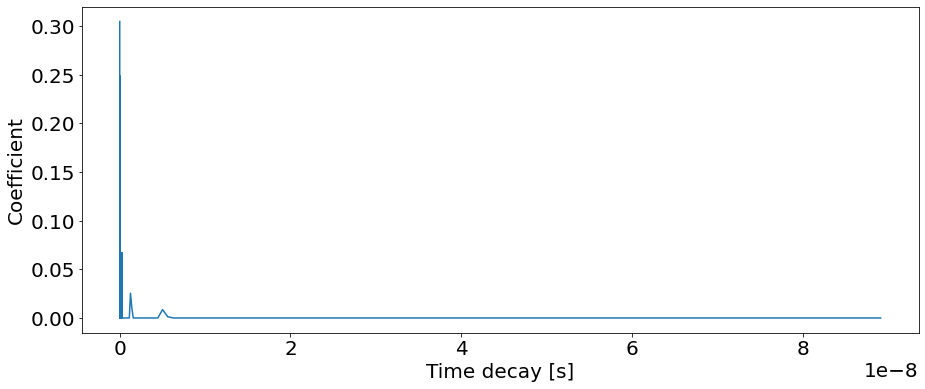

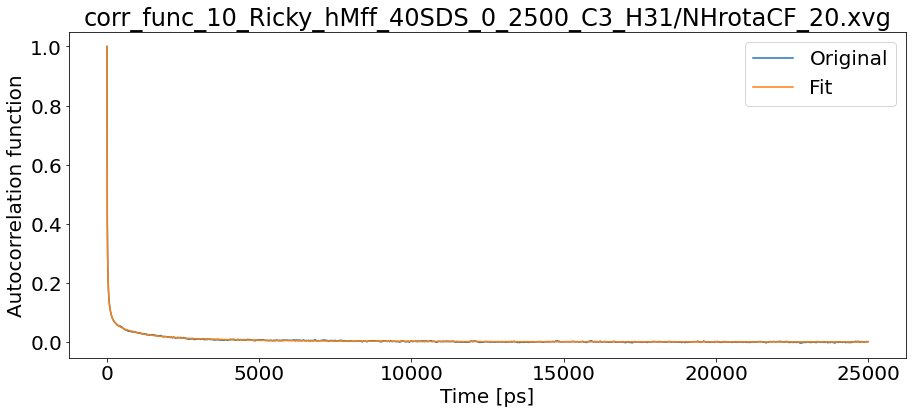

T1: 0.021117689525104705 T2: 0.01839330019086811 NOE: 0


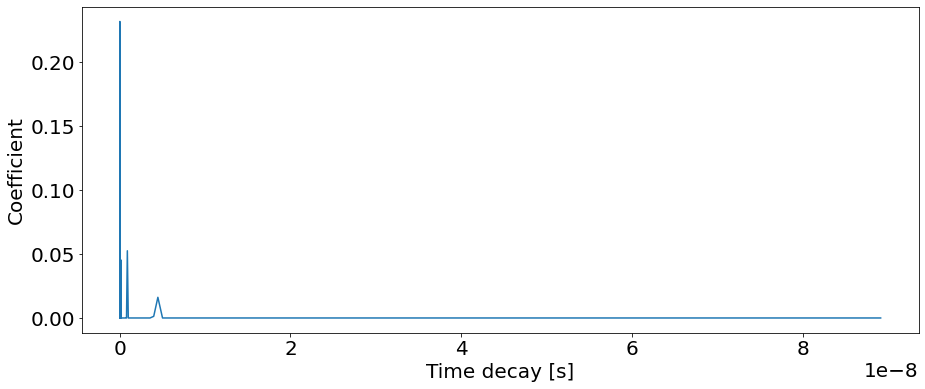

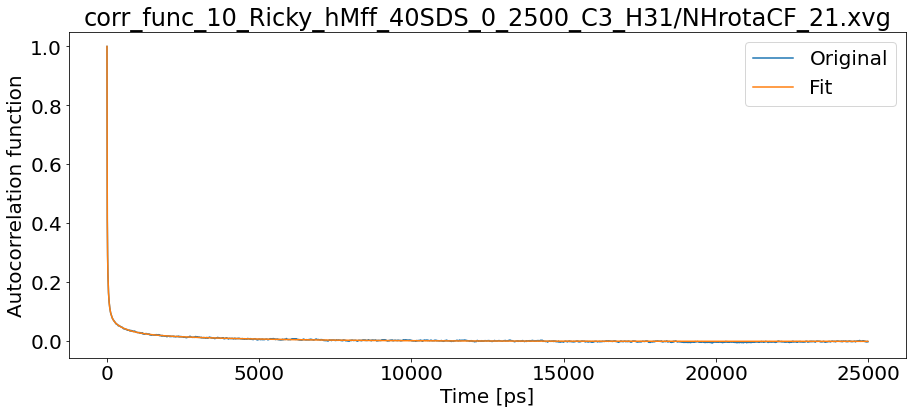

T1: 0.020078984852541247 T2: 0.017235555143534968 NOE: 0


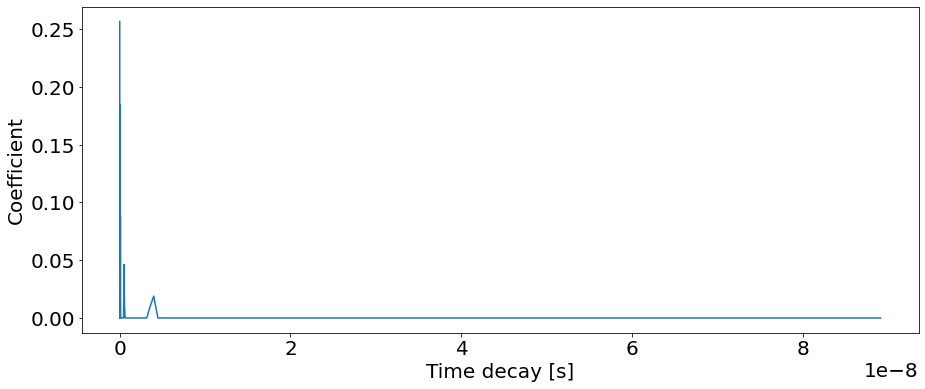

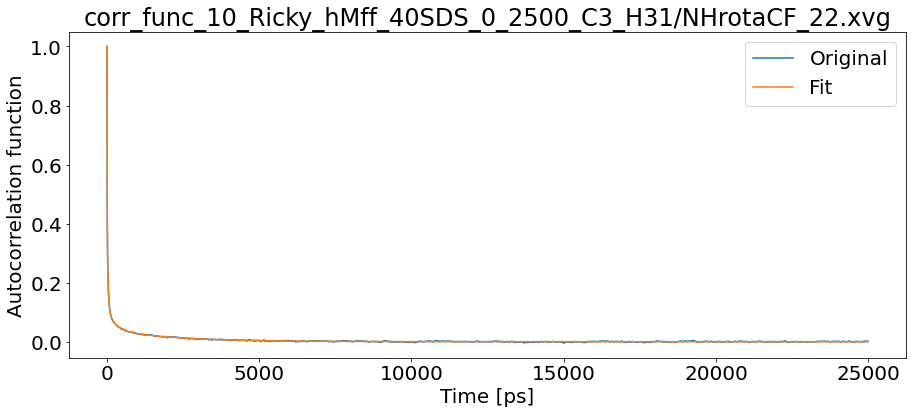

T1: 0.02280497765191237 T2: 0.018622227966352066 NOE: 0


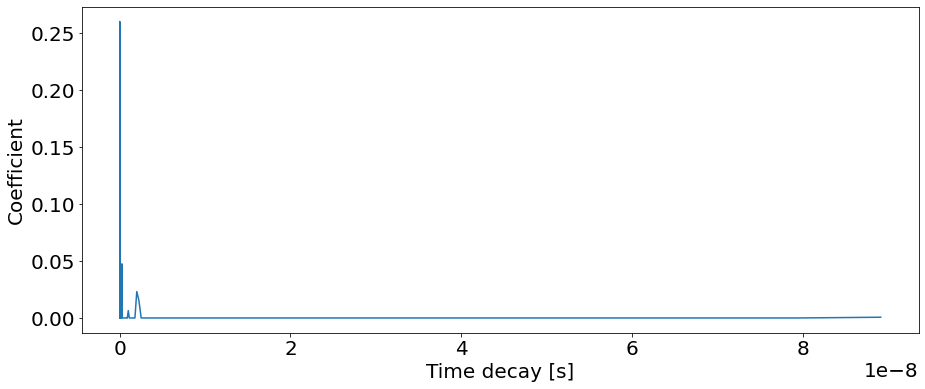

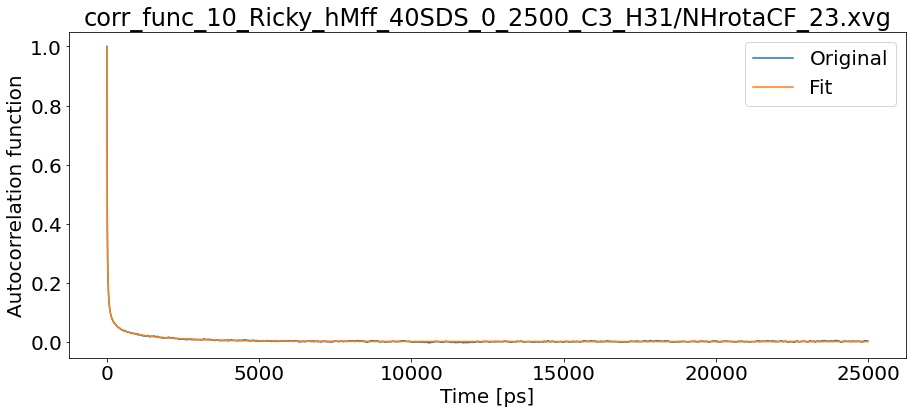

T1: 0.025903700508529217 T2: 0.01968755653073168 NOE: 0


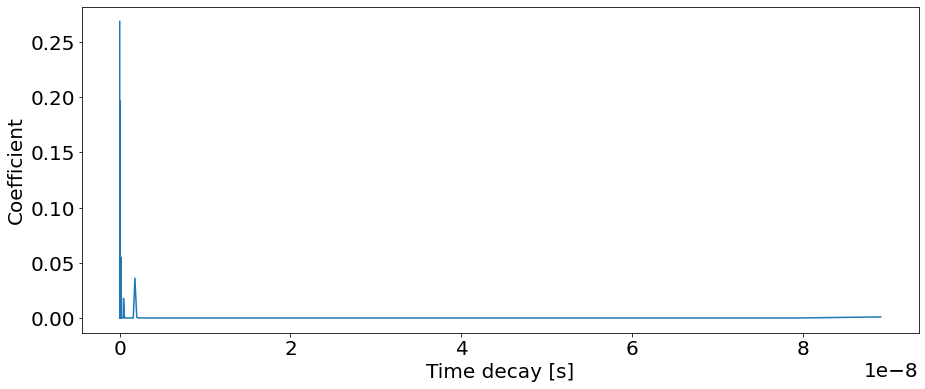

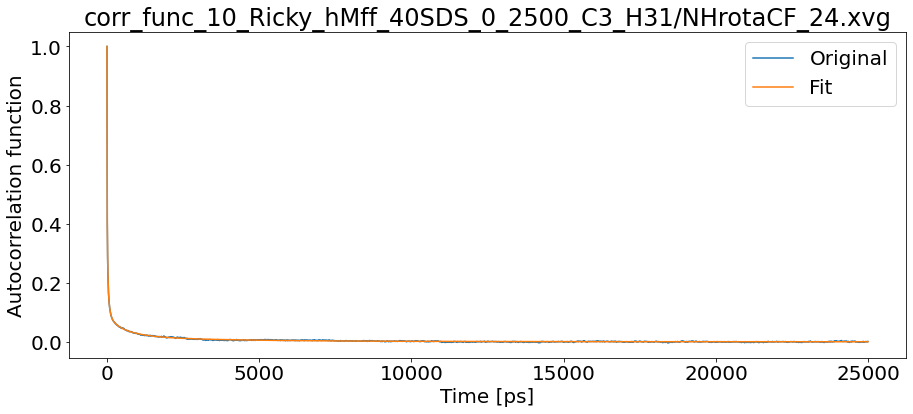

T1: 0.0226333028865456 T2: 0.020001548458833823 NOE: 0


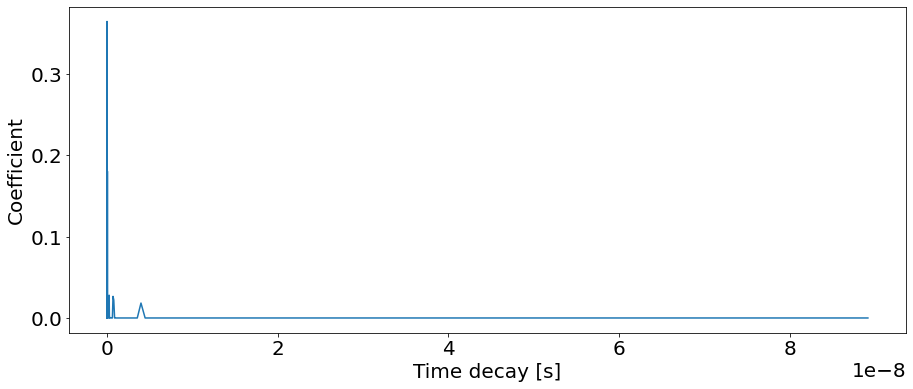

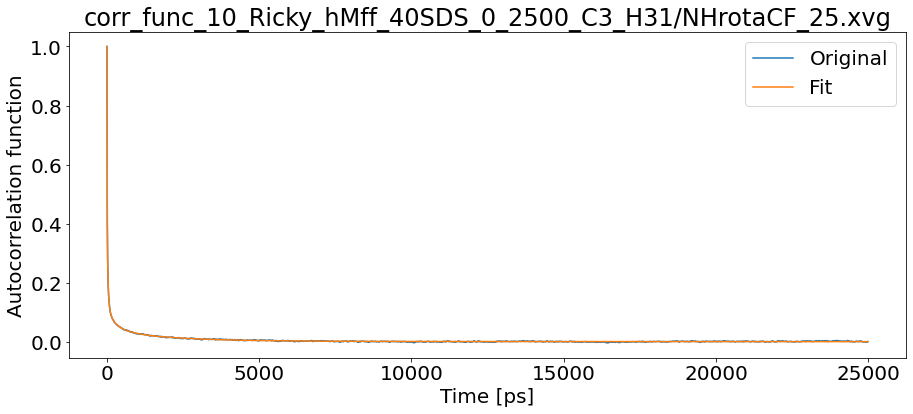

T1: 0.02303742730922957 T2: 0.01551224195520035 NOE: 0


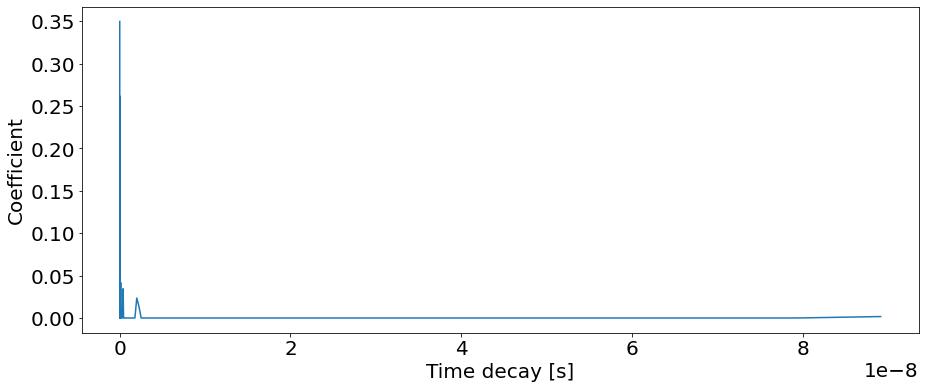

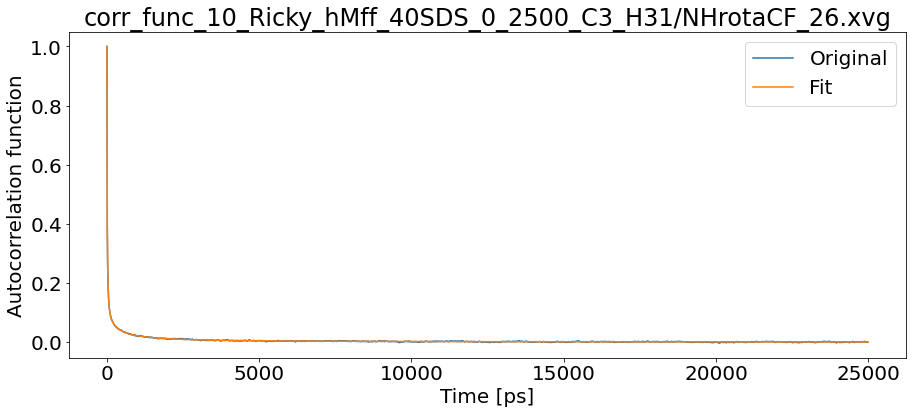

T1: 0.028087140422347275 T2: 0.023781865398990926 NOE: 0


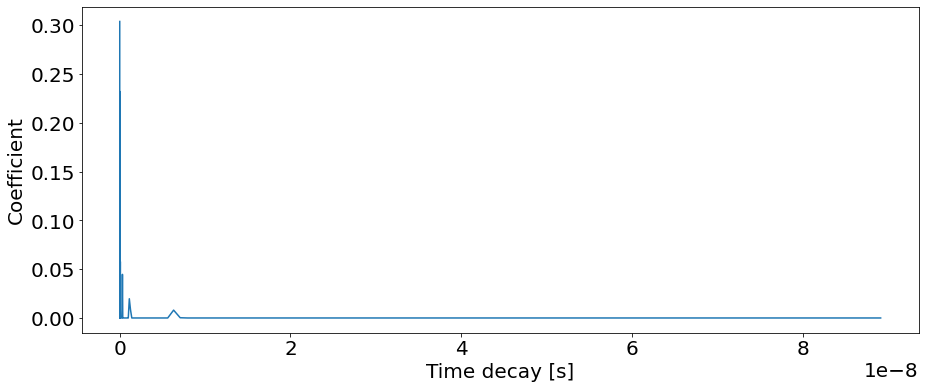

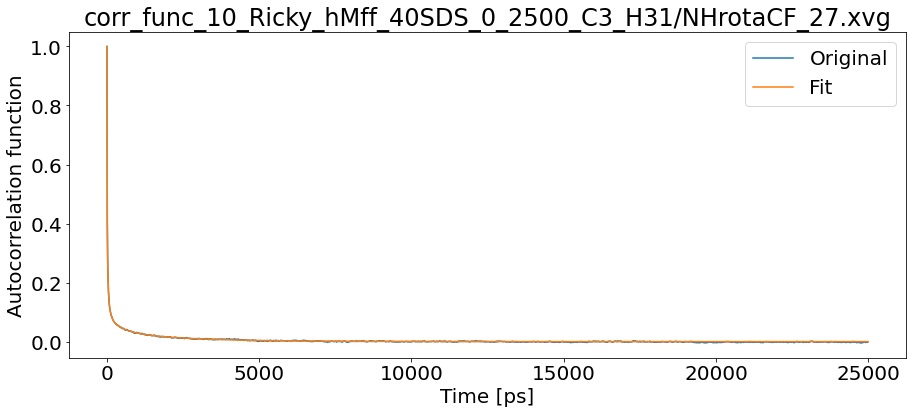

T1: 0.02218876521054758 T2: 0.02087195156253384 NOE: 0


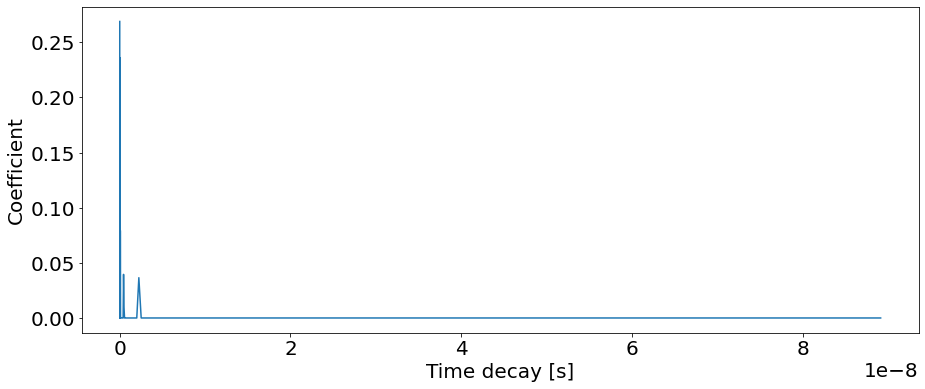

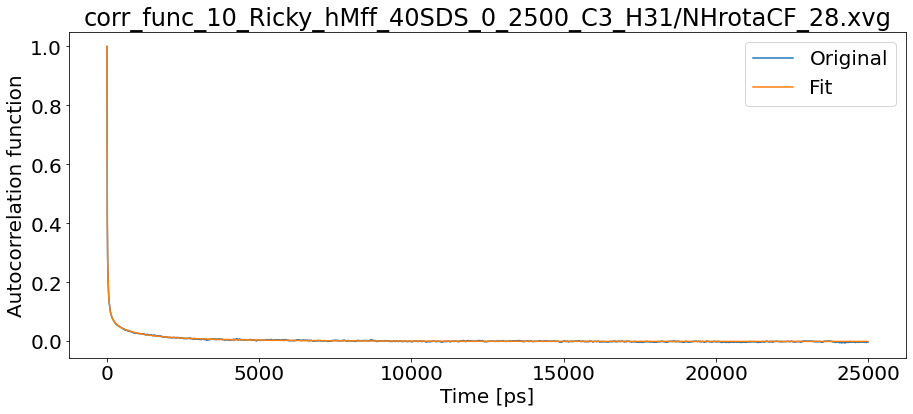

T1: 0.022695334252718795 T2: 0.02056345622645526 NOE: 0


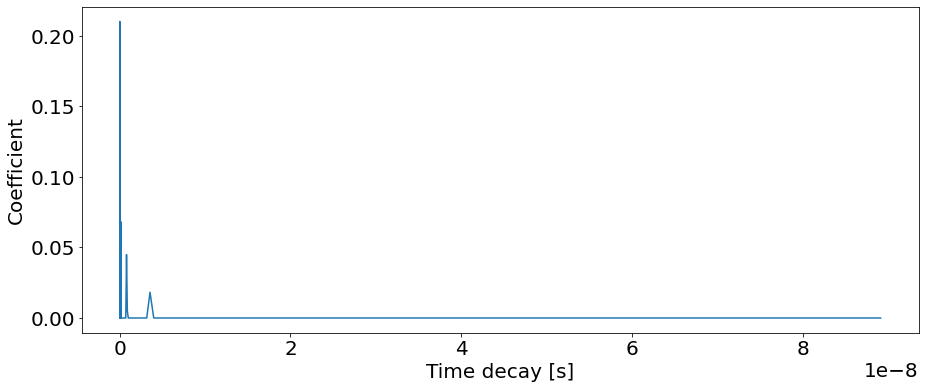

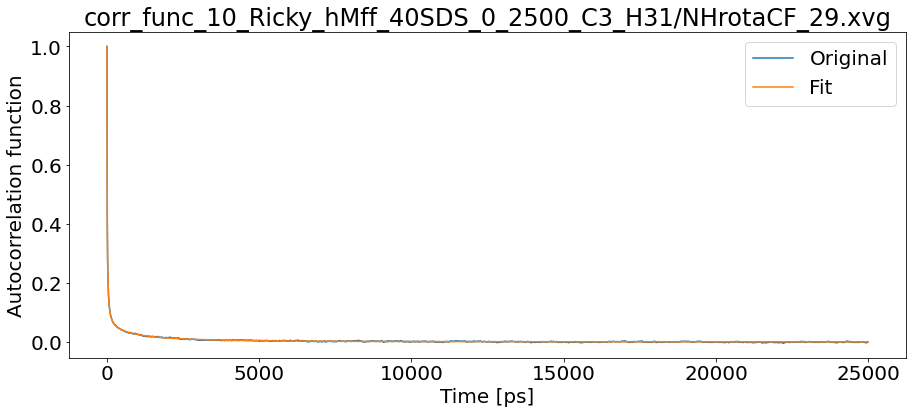

T1: 0.025051259426936135 T2: 0.022542589423557392 NOE: 0


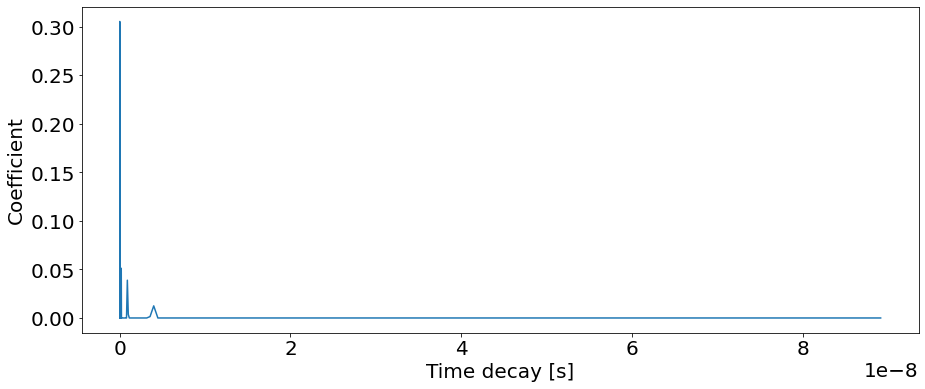

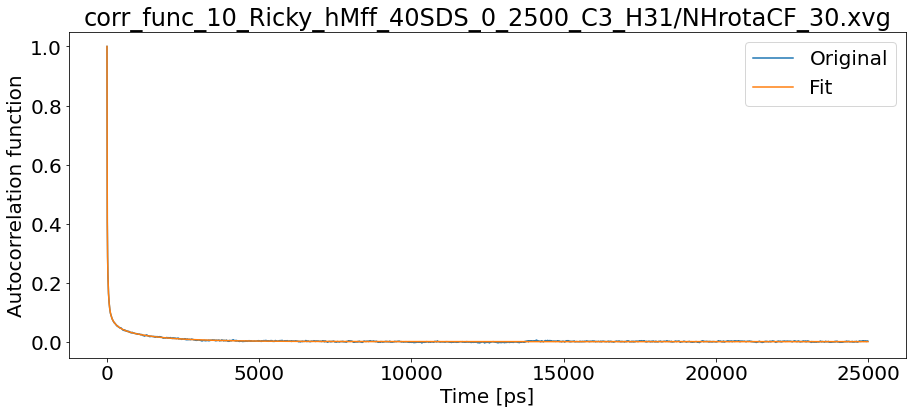

T1: 0.025716140780605024 T2: 0.022309656397970678 NOE: 0


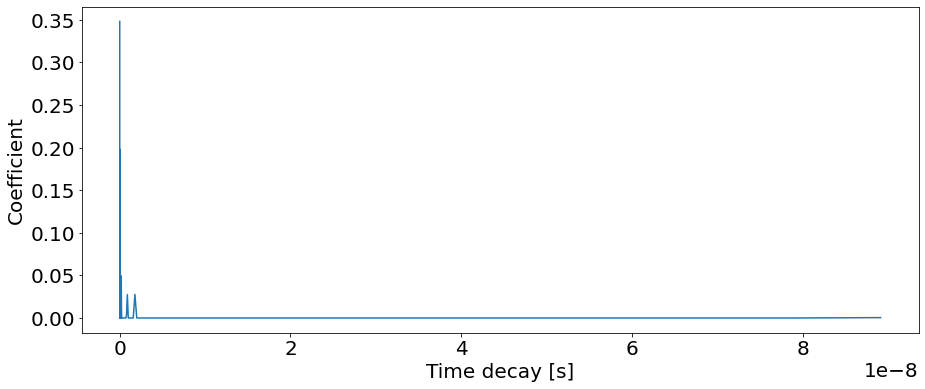

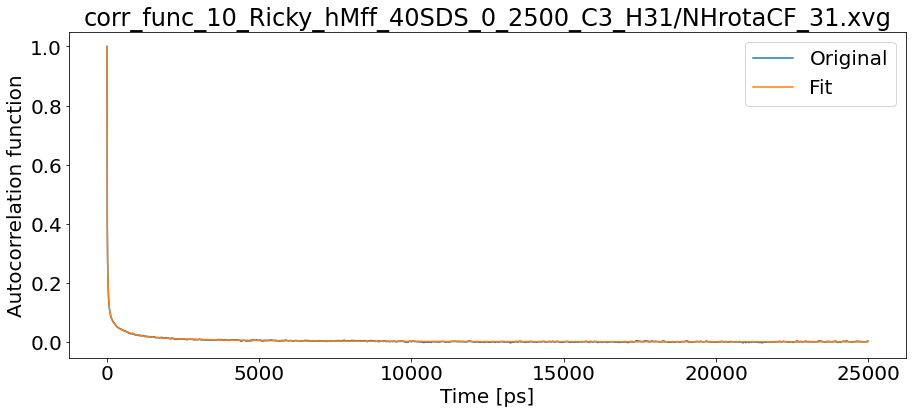

T1: 0.025639234108557656 T2: 0.022727620999572002 NOE: 0


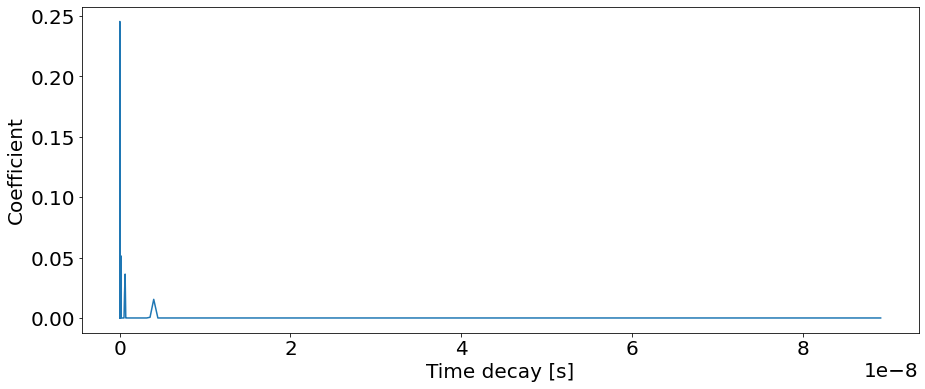

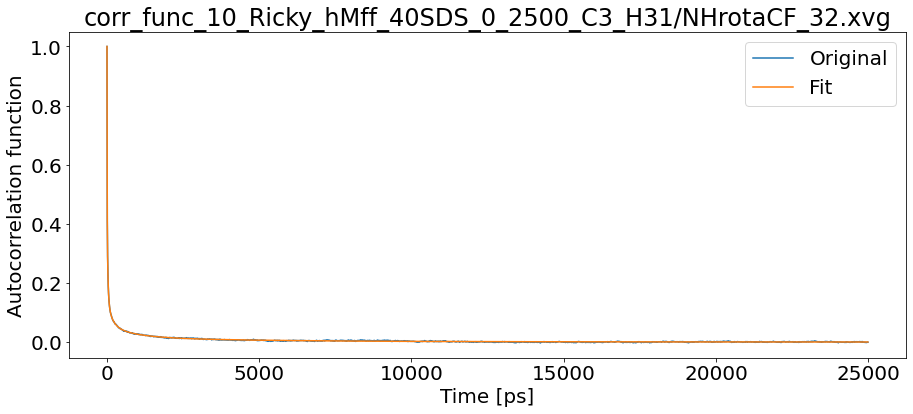

T1: 0.02278088383798924 T2: 0.019212455590197176 NOE: 0


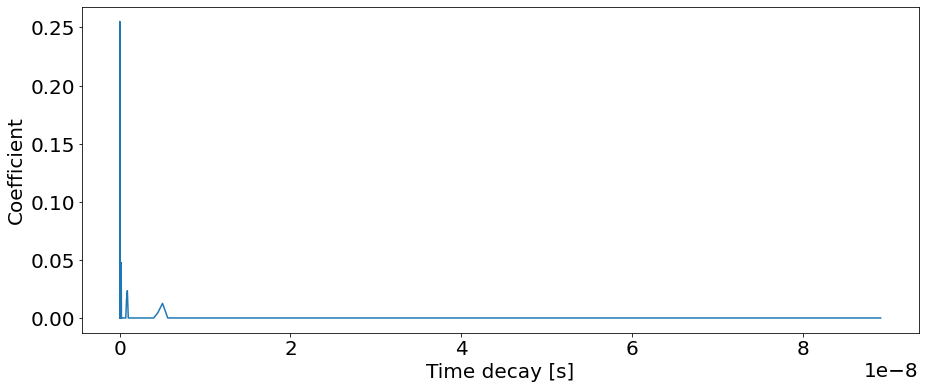

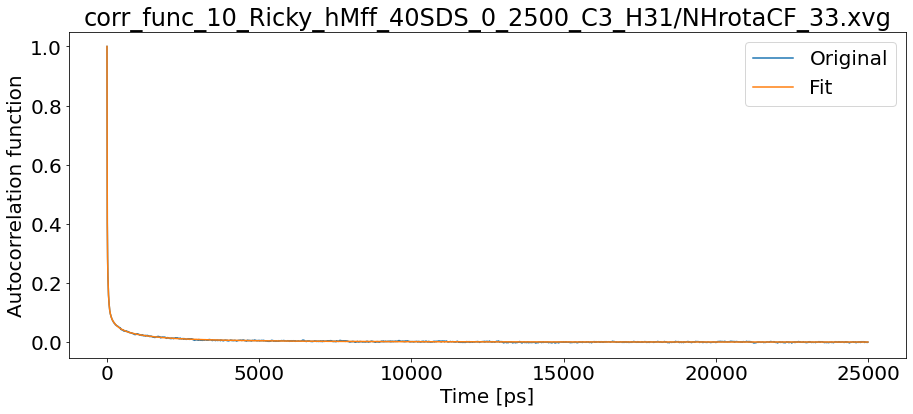

T1: 0.02411664473153344 T2: 0.0216685290287767 NOE: 0


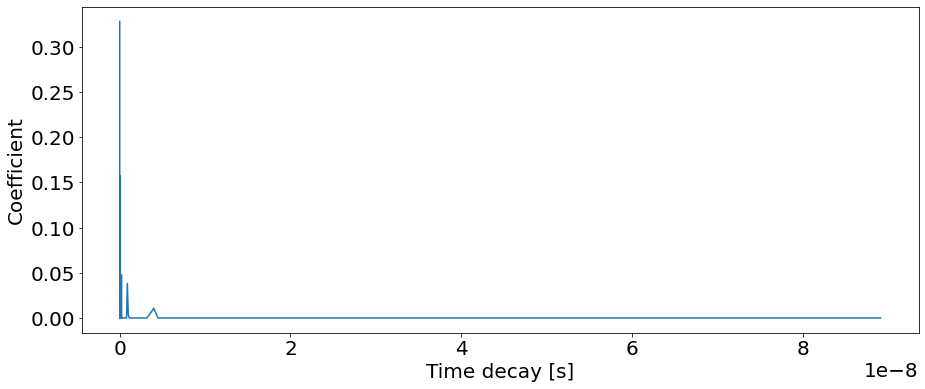

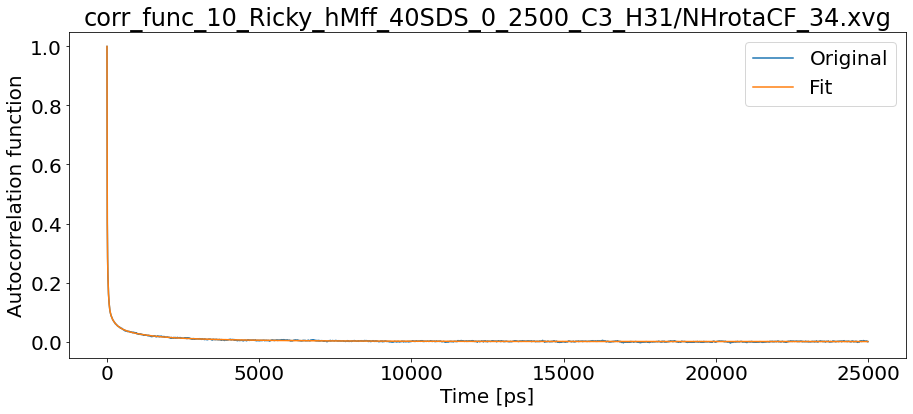

T1: 0.0234880201675006 T2: 0.02131440599695237 NOE: 0


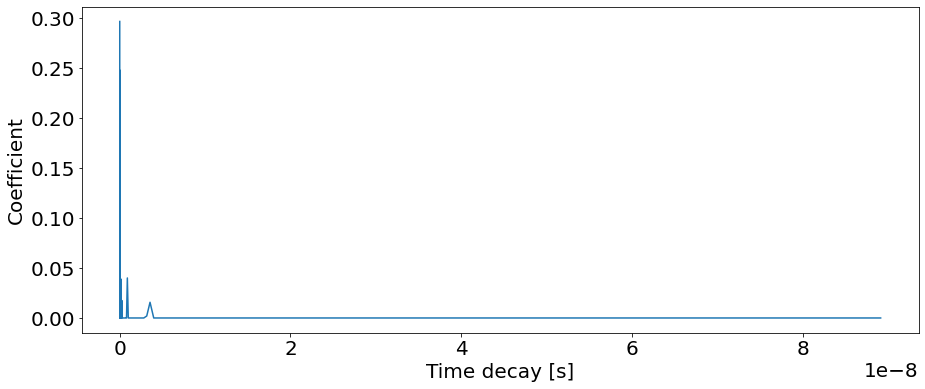

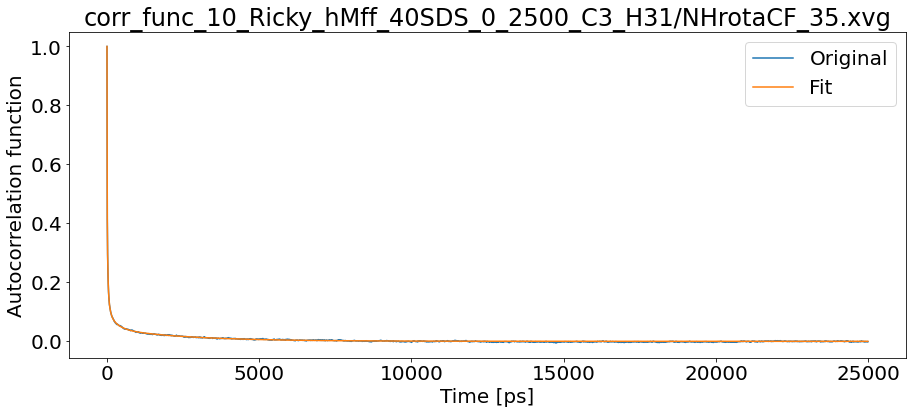

T1: 0.019327129466067145 T2: 0.017738697036933433 NOE: 0


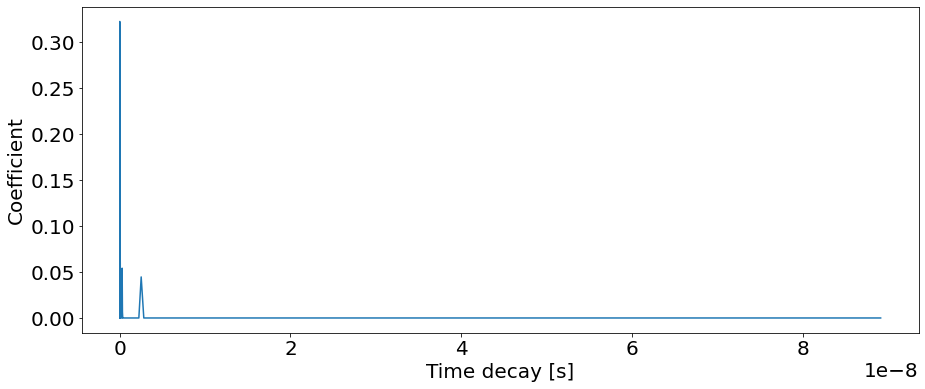

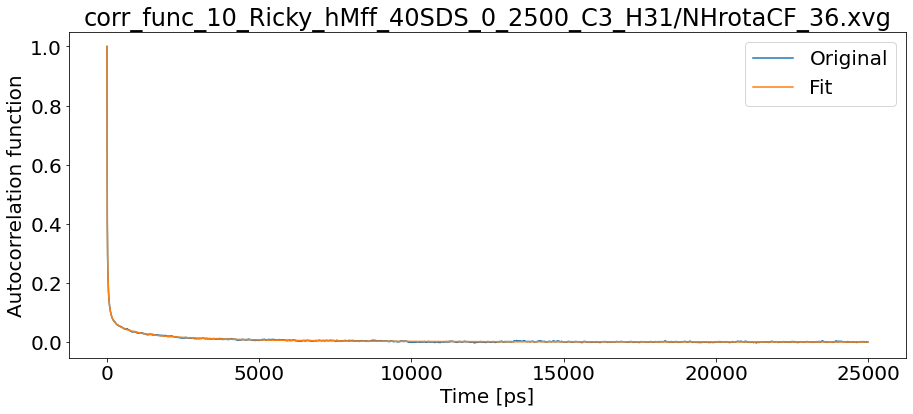

T1: 0.019679273536900403 T2: 0.01576660398348982 NOE: 0


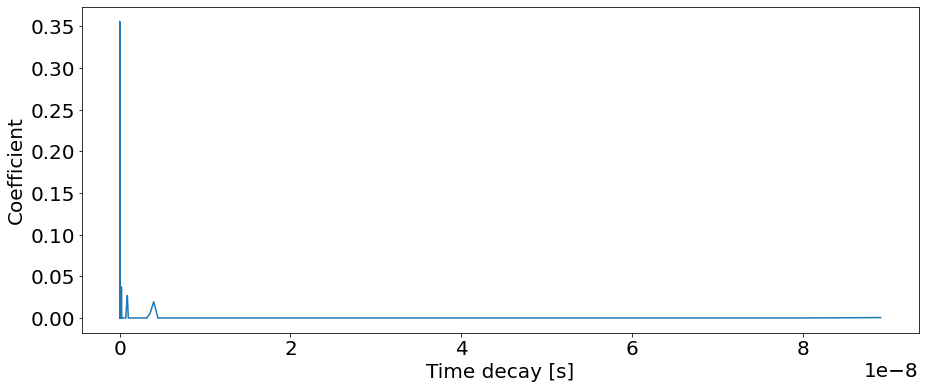

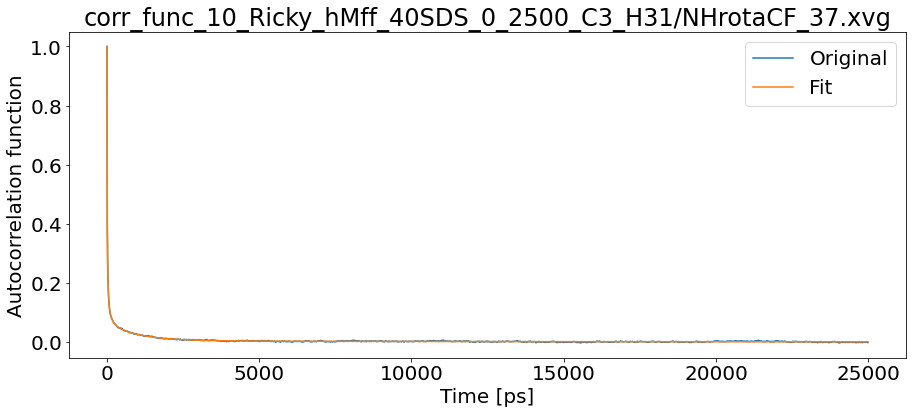

T1: 0.02752554454257997 T2: 0.023317966909880056 NOE: 0


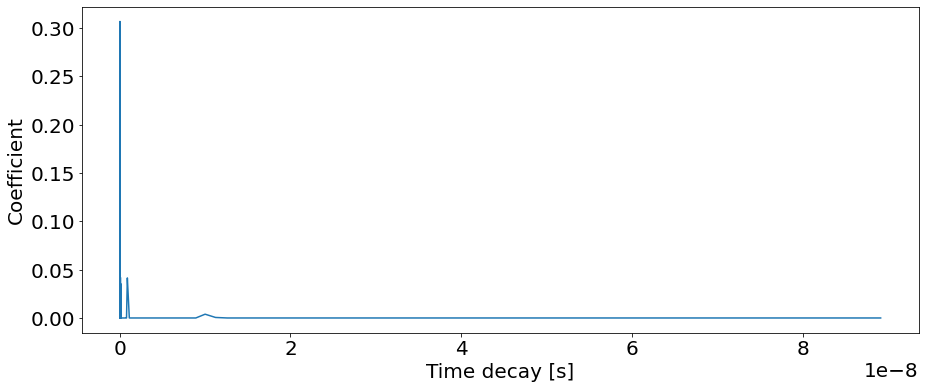

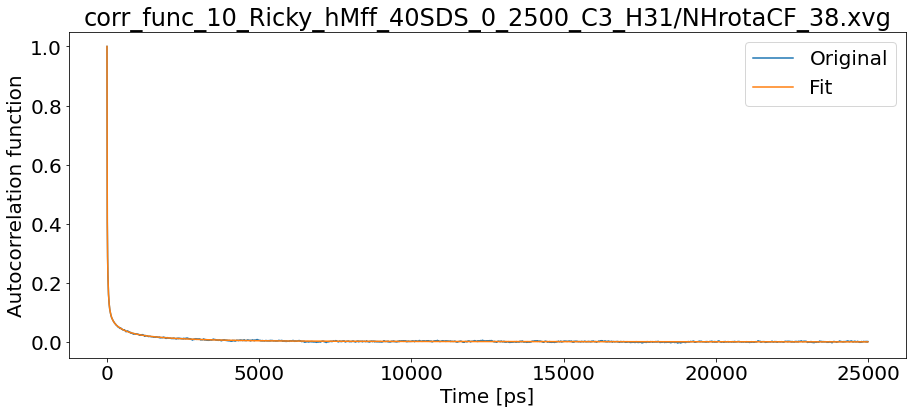

T1: 0.025274173428710325 T2: 0.018890432975426814 NOE: 0


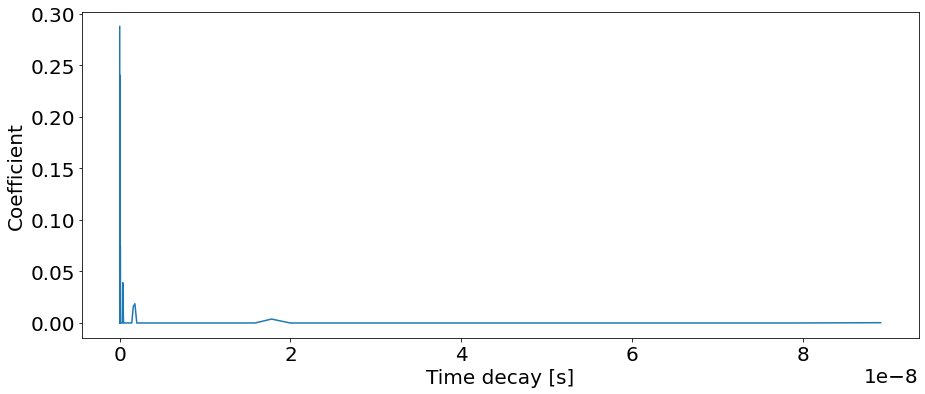

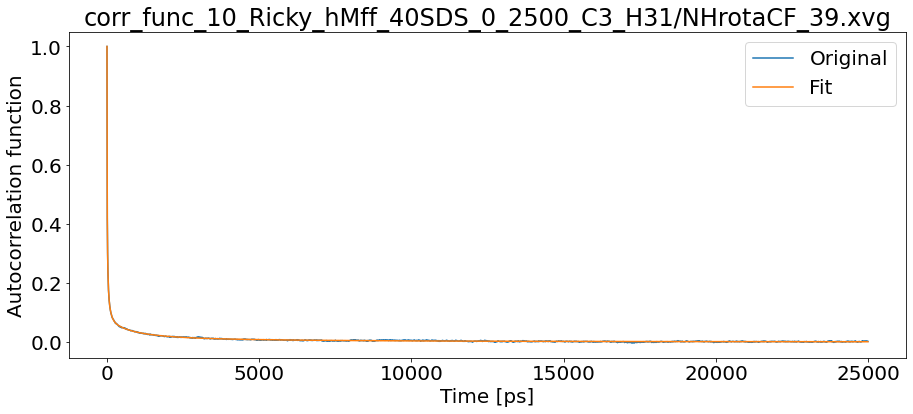

T1: 0.020384382441073608 T2: 0.01652057703165024 NOE: 0


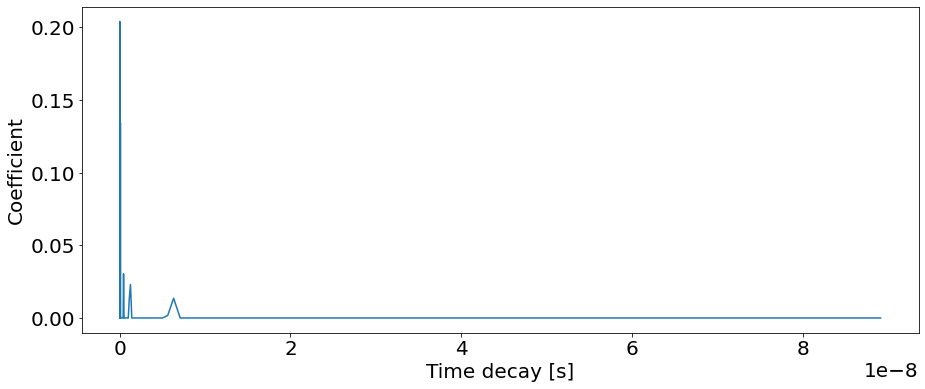

In [4]:
#2.8.2022 - try different lengths of the trajectory


"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
#magn_field=850
#magnetic_field=magn_field*2*np.pi/gammaH*10**6
nuclei="2H" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 



##############3
## CHANGE IN THE CODE 6.4.2022, not going throught the whole content of the folder anymore
###############
take_all_in_folder="number" #"yes"/"no"/"number" analyze all in folder? useful for proteins, if no, fill the following line, if yes fill the folder path
input_corr_file="alphaCF.xvg"
input_prefix="NHrotaCF_" # mostly for peptides, works with take_all_in_folder="no"
residues=40


author_name="Ricky Nencini"


#hMff 40SDS
path="/home/nenciric/Documents/MD/simulations/22_hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_10_Ricky/"
grofile="10_Ricky_hMff_40SDS.gro"
xtcfile="10_Ricky_hMff_40SDS.xtc"
tprfile="10_Ricky_hMff_40SDS.tpr"


ends=[100000,200000,500000,1000000,1500000,2000000,2500000,-1]

ends=[2500000]

for end in ends:
    #for atom1, atom2 in [("C1","H11"),("C3","H31")]:
    #    rt.CalculateCorrelationFunctions(path,begin,end,RM_avail,grofile,xtcfile,tprfile,atom1,atom2,moleculeType)

    file_to_copy= "corr_func"+ "_"  +   grofile[:-4] + "_" + str(int(begin/1000)) + "_" + str(int(end/1000)) + "_" + str(atom1) + "_" + str(atom2)+"/NHrotaCF_0.xvg"
    copy_to = "corr_func"+ "_"  +   grofile[:-4] + "_" + str(int(begin/1000)) + "_" + str(int(end/1000)) + "_C1_H11/NHrotaCF_1.xvg"
    #os.system("cp " + file_to_copy + " " + copy_to)

    folder_path="corr_func"+ "_"  +   grofile[:-4] + "_" + str(int(begin/1000)) + "_" + str(int(end/1000)) + "_C3_H31/"
    output_name="hMff_40SDS_micelle_SDS_relax_coef_0_"+str(end)+"_030822_gamma.out"


    if take_all_in_folder=="yes":
        for file in os.listdir(folder_path):
            input_corr_file = folder_path+os.fsdecode(file)
            rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
    elif take_all_in_folder=="number":
        step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
        Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
        Ctimes = Ctimes * 0.001 * 10 ** (-9);
        Ctimes_to_save=np.zeros([len(Ctimes),residues+1])
        Ctimes_to_save[:,0]=Ctimes
        for i in range(0,residues):
            input_corr_file = folder_path+input_prefix+str(i)+".xvg"
            AA=rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
            Ctimes_to_save[:,i+1]=AA.Coeffs
    else:
        rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
    
    np.savetxt(output_name,Ctimes_to_save)
    
    
    

   

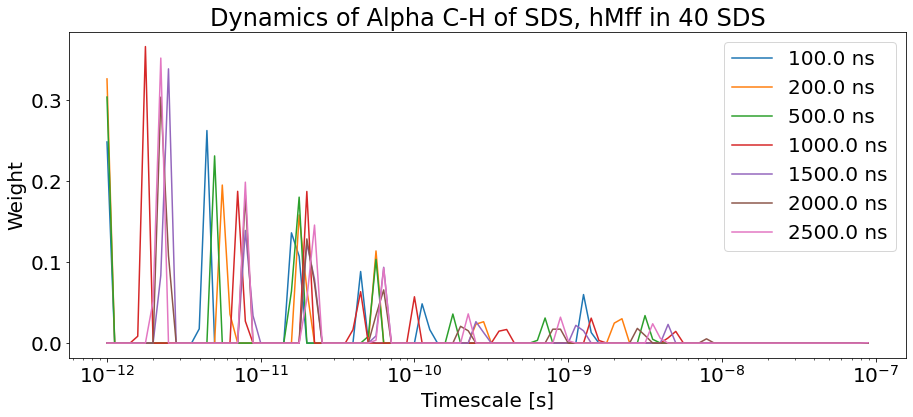

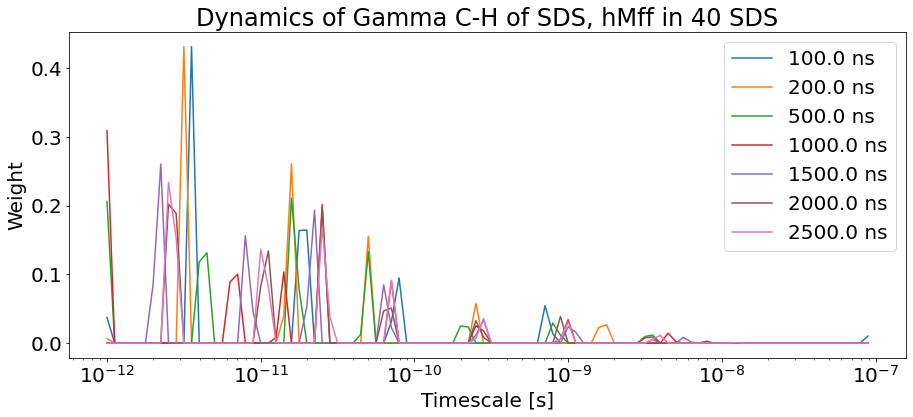

In [38]:
ends=[100000,200000,500000,1000000,1500000,2000000,2500000]
plt.figure(figsize=(15, 6))
plt.rcParams.update({'font.size': 20})
plt.xscale('log')

coef=100

for end in ends:
    output_name="hMff_40SDS_micelle_SDS_relax_coef_0_"+str(end)+"_020822.out"
    coefficients=np.loadtxt(output_name)
    plt.plot(coefficients[:coef,0],coefficients[:coef,1],label=str(end/1000)+" ns")
    
plt.xlabel("Timescale [s]")
plt.ylabel("Weight")
plt.title("Dynamics of Alpha C-H of SDS, hMff in 40 SDS")
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.rcParams.update({'font.size': 20})
plt.xscale('log')

for end in ends:
    output_name="hMff_40SDS_micelle_SDS_relax_coef_0_"+str(end)+"_020822.out"
    coefficients=np.loadtxt(output_name)
    plt.plot(coefficients[:coef,0],coefficients[:coef,2],label=str(end/1000)+" ns")
    
plt.xlabel("Timescale [s]")
plt.ylabel("Weight")
plt.title("Dynamics of Gamma C-H of SDS, hMff in 40 SDS")
plt.legend()
plt.show()

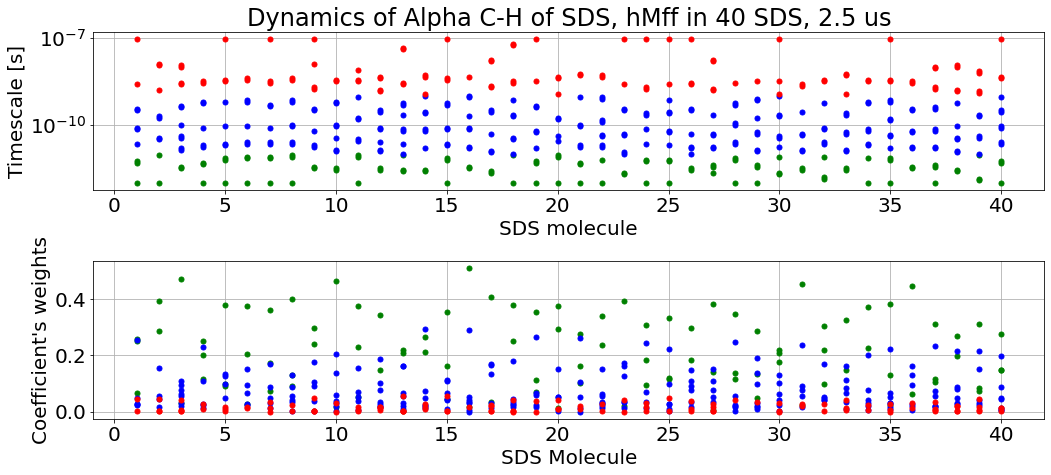

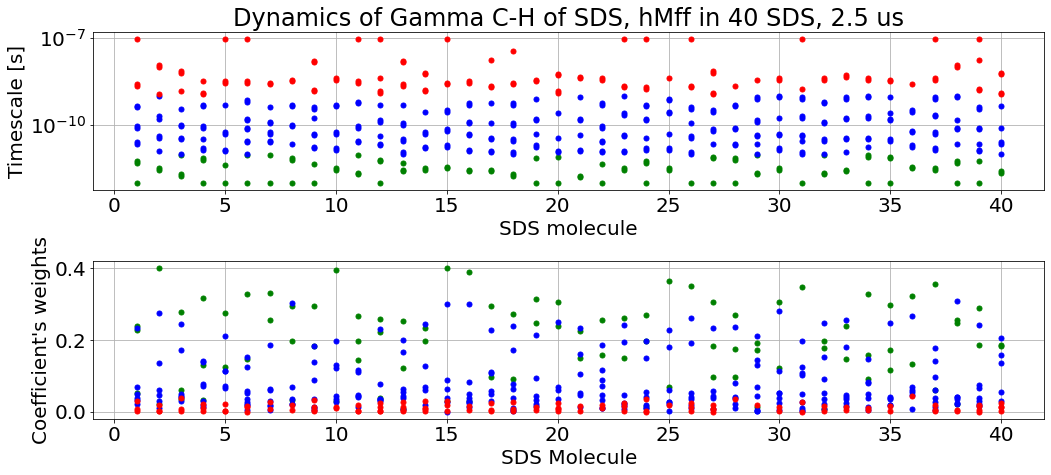

In [33]:
# 3.8.2022 - plot 40 SDS, hMff for diferent lengts of trajectories + individual molecules

Ctimes_to_save=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_2500000_030822_alpha.out")

plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True



fig, (ax1, ax2) = plt.subplots(2)

ax1.title.set_text("Dynamics of Alpha C-H of SDS, hMff in 40 SDS, 2.5 us")

ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("SDS molecule")
#ax1.set_ylim([10**(-12.4), 10**(-6.8)])


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("SDS Molecule")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                     
        
plt.show()    


Ctimes_to_save=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_2500000_030822_gamma.out")


plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True



fig, (ax1, ax2) = plt.subplots(2)

ax1.title.set_text("Dynamics of Gamma C-H of SDS, hMff in 40 SDS, 2.5 us")

ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("SDS molecule")
#ax1.set_ylim([10**(-12.4), 10**(-6.8)])


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("SDS Molecule")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                     
        
plt.show() 




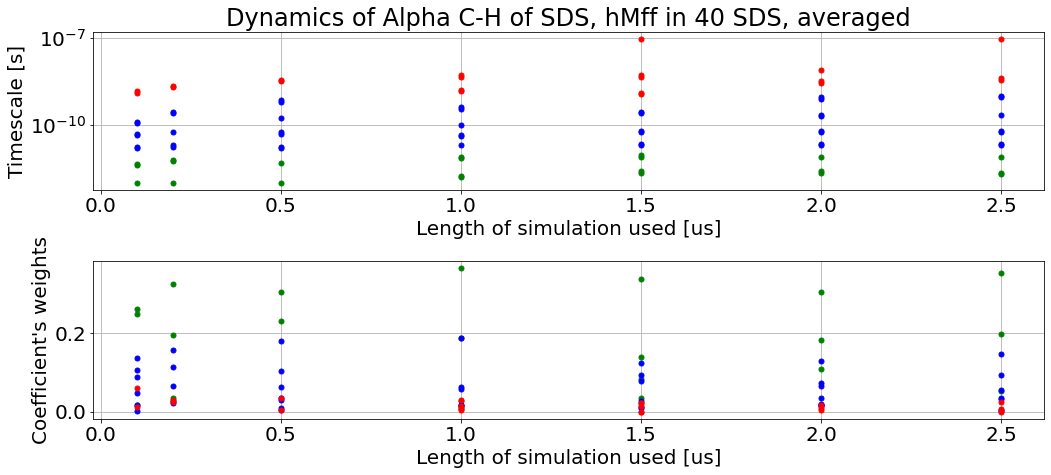

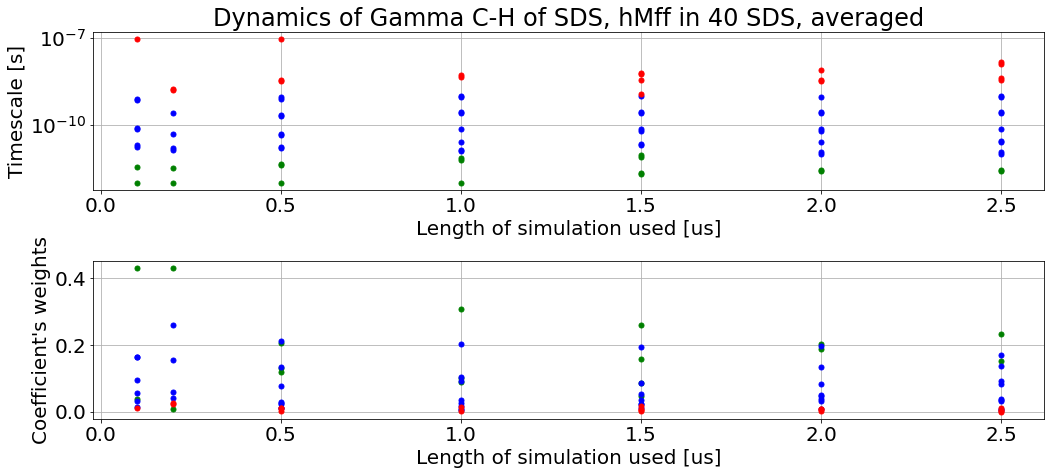

In [34]:
Ctimes_to_save=np.zeros((100,8))
Ctimes_to_save[:,0:2]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_100000_020822.out")[:,0:2]
Ctimes_to_save[:,2]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_200000_020822.out")[:,1]
Ctimes_to_save[:,3]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_500000_020822.out")[:,1]
Ctimes_to_save[:,4]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_1000000_020822.out")[:,1]
Ctimes_to_save[:,5]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_1500000_020822.out")[:,1]
Ctimes_to_save[:,6]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_2000000_020822.out")[:,1]
Ctimes_to_save[:,7]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_2500000_020822.out")[:,1]


plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True



fig, (ax1, ax2) = plt.subplots(2)

ax1.title.set_text("Dynamics of Alpha C-H of SDS, hMff in 40 SDS, averaged")

ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("Length of simulation used [us]")
#ax1.set_ylim([10**(-12.4), 10**(-6.8)])

ends=[100000,200000,500000,1000000,1500000,2000000,2500000]

for residue in range(1,Ctimes_to_save.shape[1]):
    length=ends[residue-1]/1000000
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(length, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(length, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(length, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("Length of simulation used [us]")


for residue in range(1,Ctimes_to_save.shape[1]):
    length=ends[residue-1]/1000000
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(length, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(length, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(length, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                     
        
plt.show() 



Ctimes_to_save=np.zeros((100,8))
Ctimes_to_save[:,0:2]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_100000_020822.out")[:,[0,2]]
Ctimes_to_save[:,2]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_200000_020822.out")[:,2]
Ctimes_to_save[:,3]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_500000_020822.out")[:,2]
Ctimes_to_save[:,4]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_1000000_020822.out")[:,2]
Ctimes_to_save[:,5]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_1500000_020822.out")[:,2]
Ctimes_to_save[:,6]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_2000000_020822.out")[:,2]
Ctimes_to_save[:,7]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_2500000_020822.out")[:,2]


plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True



fig, (ax1, ax2) = plt.subplots(2)

ax1.title.set_text("Dynamics of Gamma C-H of SDS, hMff in 40 SDS, averaged")

ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("Length of simulation used [us]")
#ax1.set_ylim([10**(-12.4), 10**(-6.8)])

ends=[100000,200000,500000,1000000,1500000,2000000,2500000]

for residue in range(1,Ctimes_to_save.shape[1]):
    length=ends[residue-1]/1000000
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(length, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(length, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(length, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("Length of simulation used [us]")


for residue in range(1,Ctimes_to_save.shape[1]):
    length=ends[residue-1]/1000000
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(length, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(length, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(length, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                     
        
plt.show() 

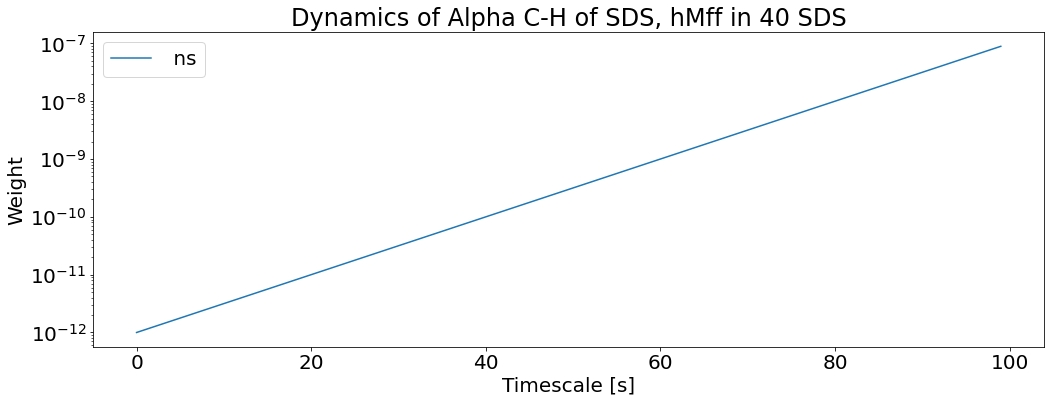

In [44]:
Ctimes_to_save=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_100000_020822.out")
plt.figure(figsize=(15, 6))
plt.rcParams.update({'font.size': 20})
plt.yscale('log')

coef=100


plt.plot(np.linspace(0, 99,100),Ctimes_to_save[:,0],label=" ns")
    
plt.xlabel("Timescale [s]")
plt.ylabel("Weight")
plt.title("Dynamics of Alpha C-H of SDS, hMff in 40 SDS")
plt.legend()
plt.show()

In [47]:
for i in range (0,10):
    if i==2:
        i+2
    print(i)

0
1
2
3
4
5
6
7
8
9


In [ ]:
#eYqjD 50SDS
path="/media/nenciric/Ricky2022/morgan/1_eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC/"
grofile="5_eYqjD_50SDS_micelle_310K_CHARMM_lastframe_FromSofia_SDS_Protein_SOD_solvated_OPC_local_run_20ps_mahti_110ns_mahti_20ns_mahti.gro"
xtcfile="6_eYqjD_50SDS_micelle_310K_CHARMM_lastframe_FromSofia_SDS_Protein_SOD_solvated_OPC_local_run_20ps_mahti_110ns_mahti_20ns_mahti_3248ns.xtc"
tprfile="5_eYqjD_50SDS_micelle_310K_CHARMM_lastframe_FromSofia_SDS_Protein_SOD_solvated_OPC_local_run_20ps_mahti_110ns_mahti.tpr"


In [51]:
#hmff 60SDS
#path="/media/nenciric/Ricky2022/morgan/23_hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC/"
#grofile="7-Ricky_hMff_60SDS.gro"
#xtcfile="7-Ricky_hMff_60SDS.xtc"
#tprfile="7-Ricky_hMff_60SDS.tpr"


#hMff 40SDS
#path="/media/nenciric/Ricky2022/morgan/22_hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC/"
#grofile="10_Ricky_hMff_40SDS.gro"
#xtcfile="10_Ricky_hMff_40SDS.xtc"
#tprfile="10_Ricky_hMff_40SDS.tpr"

#hMff 45SDS
#path="/media/nenciric/Ricky2022/morgan/21_hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC/"
#grofile="10_Ricky_hMff_45SDS.gro"
#xtcfile="10_Ricky_hMff_45SDS.xtc"
#tprfile="10_Ricky_hMff_45SDS.tpr"

#hMff 50SDS
path="/media/nenciric/Ricky2022/morgan/2_hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC/"
grofile="10-Ricky_hMff_50SDS.gro"
xtcfile="10-Ricky_hMff_50SDS_no_PBC.xtc"
tprfile="10-Ricky_hMff_50SDS.tpr"


In [52]:
for atom1, atom2 in [("C1","H11"),("C3","H31")]:
    rt.CalculateCorrelationFunctions(path,begin,end,RM_avail,grofile,xtcfile,tprfile,atom1,atom2,moleculeType)

Number of corelation functions to calculate: 1 

Calculatin correlation function 1


                      :-) GROMACS - gmx rotacf, 2021.5 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

Number of corelation functions to calculate: 1 

Calculatin correlation function 1


                      :-) GROMACS - gmx rotacf, 2021.5 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [53]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
#magn_field=850
#magnetic_field=magn_field*2*np.pi/gammaH*10**6
nuclei="2H" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 



##############3
## CHANGE IN THE CODE 6.4.2022, not going throught the whole content of the folder anymore
###############
take_all_in_folder="number" #"yes"/"no"/"number" analyze all in folder? useful for proteins, if no, fill the following line, if yes fill the folder path
input_corr_file="alphaCF.xvg"

input_prefix="NHrotaCF_" # mostly for peptides, works with take_all_in_folder="no"



## eElab 31.5.22
folder_path="corr_func_0_32480_C1_H11/"
output_name="hMff_50SDS_micelle_SDS_relax_coef.out"
residues=2


author_name="Ricky Nencini"

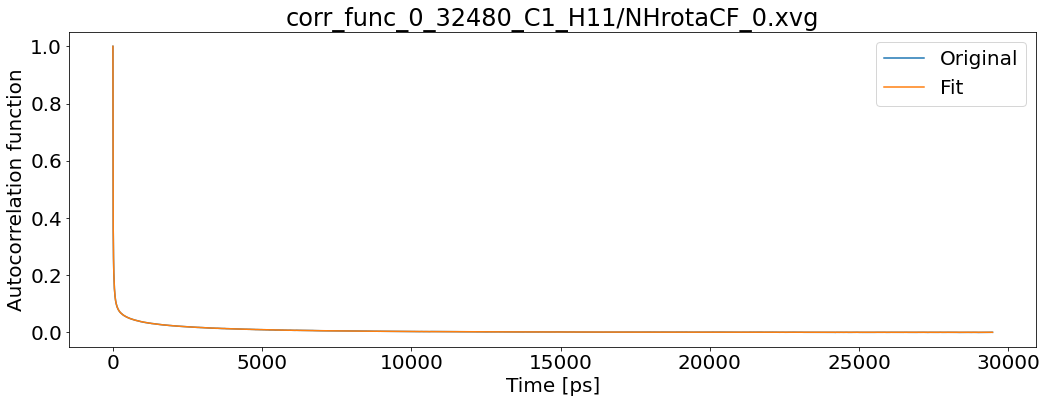

T1: 0.018157078470558703 T2: 0.01508136557712924 NOE: 0


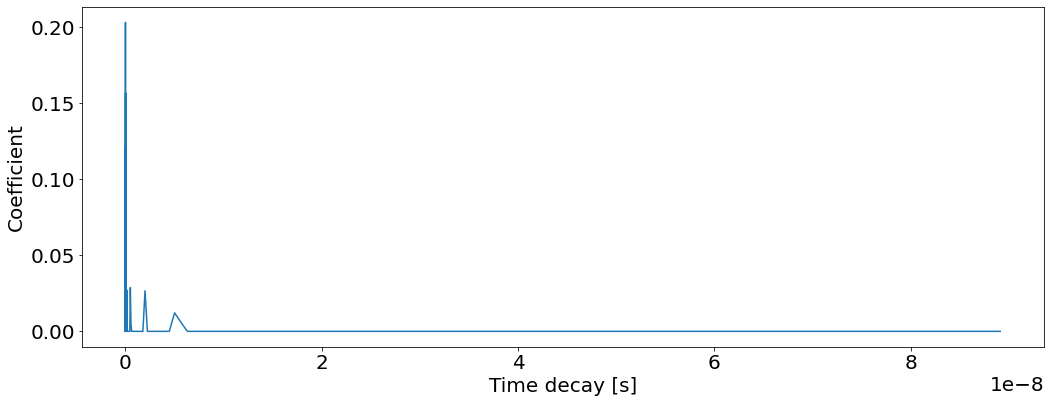

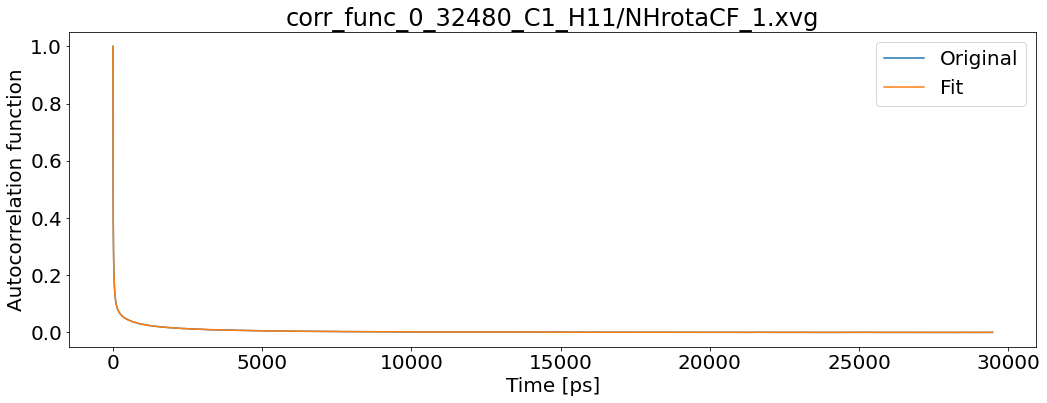

T1: 0.022605312551829446 T2: 0.019481458595531905 NOE: 0


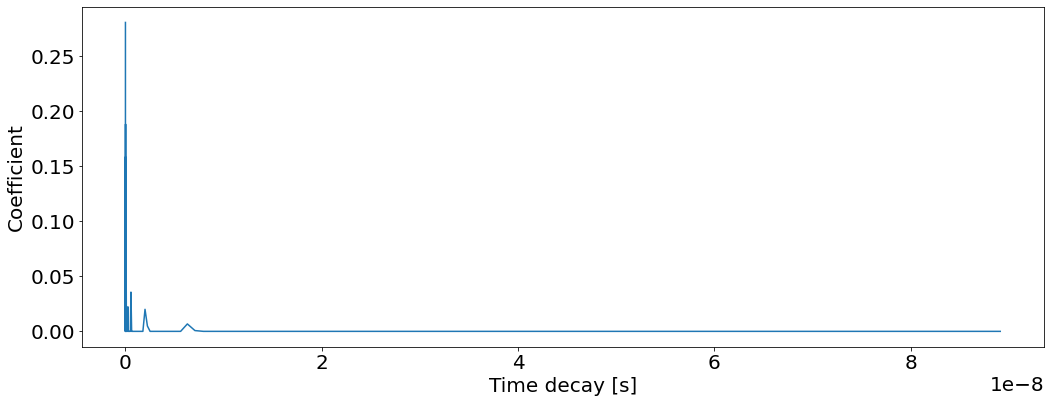

In [54]:
"""Execute the code - this part needs not be modified"""
#rt.initilize_output(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name,author_name)
if take_all_in_folder=="yes":
    for file in os.listdir(folder_path):
        input_corr_file = folder_path+os.fsdecode(file)
        rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
elif take_all_in_folder=="number":
    step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
    Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
    Ctimes = Ctimes * 0.001 * 10 ** (-9);
    Ctimes_to_save=np.zeros([len(Ctimes),residues+1])
    Ctimes_to_save[:,0]=Ctimes
    for i in range(0,residues):
        input_corr_file = folder_path+input_prefix+str(i)+".xvg"
        AA=rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
        Ctimes_to_save[:,i+1]=AA.Coeffs
else:
    rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
    
np.savetxt(output_name,Ctimes_to_save)

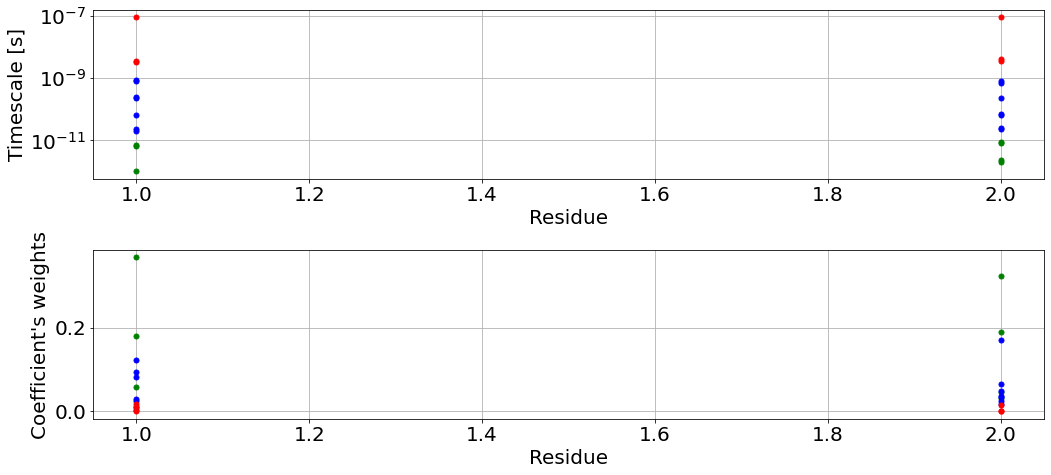

In [8]:
plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2) = plt.subplots(2)



ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("Residue")
#ax1.set_ylim([10**(-12.4), 10**(-6.8)])


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("Residue")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                     
        
plt.show()    

In [9]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
#magn_field=850
#magnetic_field=magn_field*2*np.pi/gammaH*10**6
nuclei="2H" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 



##############3
## CHANGE IN THE CODE 6.4.2022, not going throught the whole content of the folder anymore
###############
take_all_in_folder="number" #"yes"/"no"/"number" analyze all in folder? useful for proteins, if no, fill the following line, if yes fill the folder path
input_corr_file="alphaCF.xvg"

input_prefix="NHrotaCF_" # mostly for peptides, works with take_all_in_folder="no"



## eElab 31.5.22
folder_path="/home/nenciric/Documents/git/CorysPeptides/figure1/water_correlation_functions/OPC/"
output_name="60SDS_micelle_SDS_relax_alpha.out"
residues=2


author_name="Ricky Nencini"




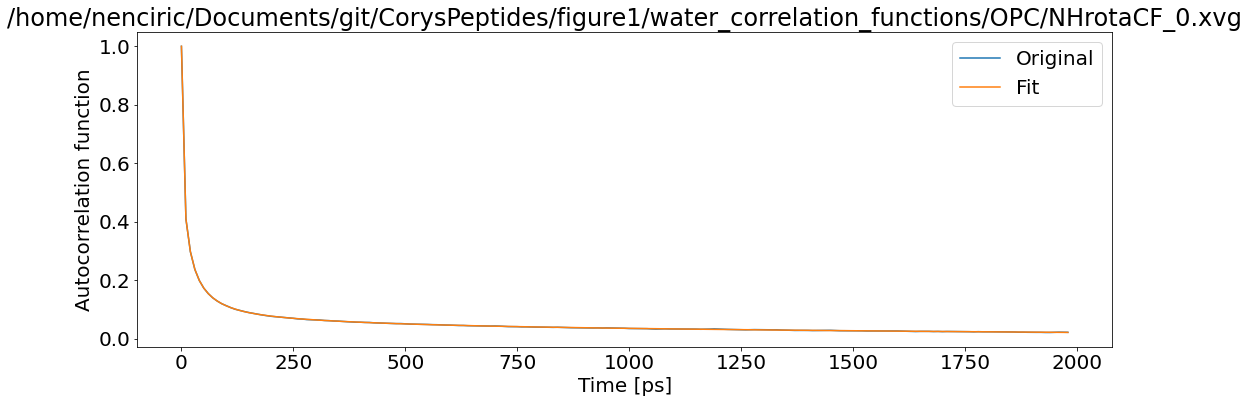

T1: 0.018862172103752264 T2: 0.01768723275803335 NOE: 0


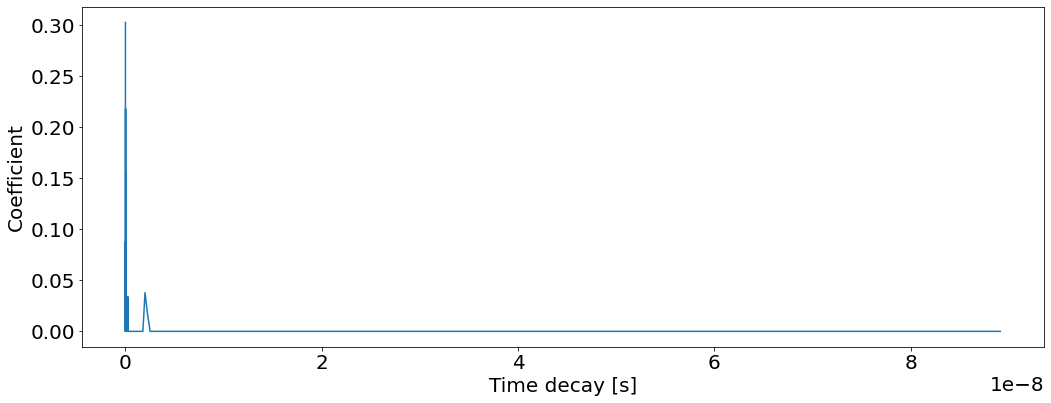

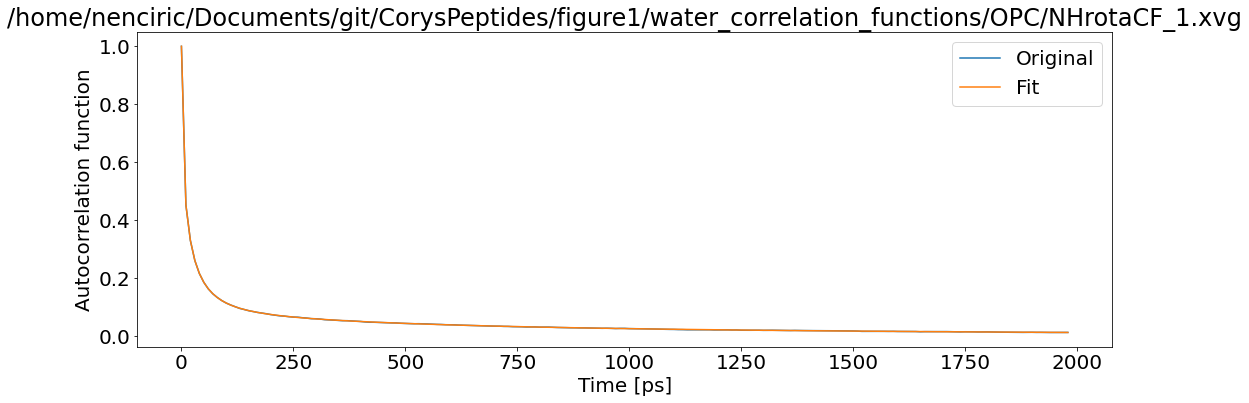

T1: 0.024312122146161606 T2: 0.023482040600615203 NOE: 0


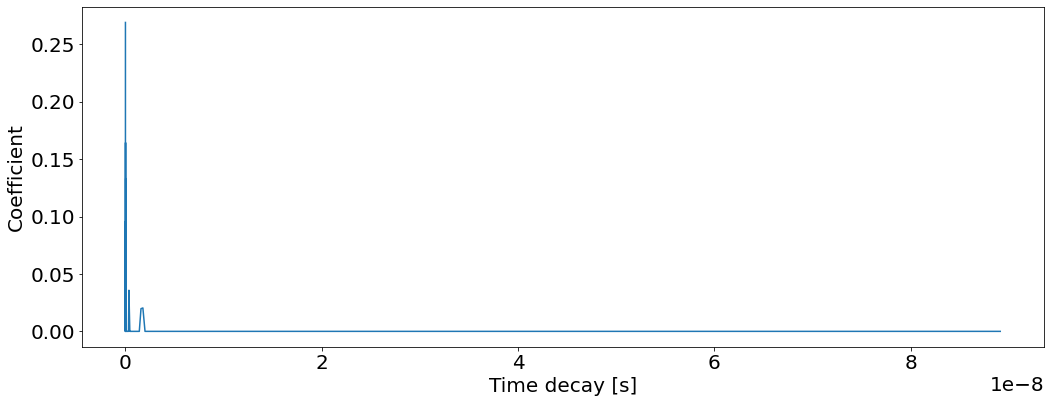

In [10]:
"""Execute the code - this part needs not be modified"""
#rt.initilize_output(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name,author_name)
if take_all_in_folder=="yes":
    for file in os.listdir(folder_path):
        input_corr_file = folder_path+os.fsdecode(file)
        rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
elif take_all_in_folder=="number":
    step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
    Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
    Ctimes = Ctimes * 0.001 * 10 ** (-9);
    Ctimes_to_save=np.zeros([len(Ctimes),residues+1])
    Ctimes_to_save[:,0]=Ctimes
    for i in range(0,residues):
        input_corr_file = folder_path+input_prefix+str(i)+".xvg"
        AA=rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
        Ctimes_to_save[:,i+1]=AA.Coeffs
else:
    rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)

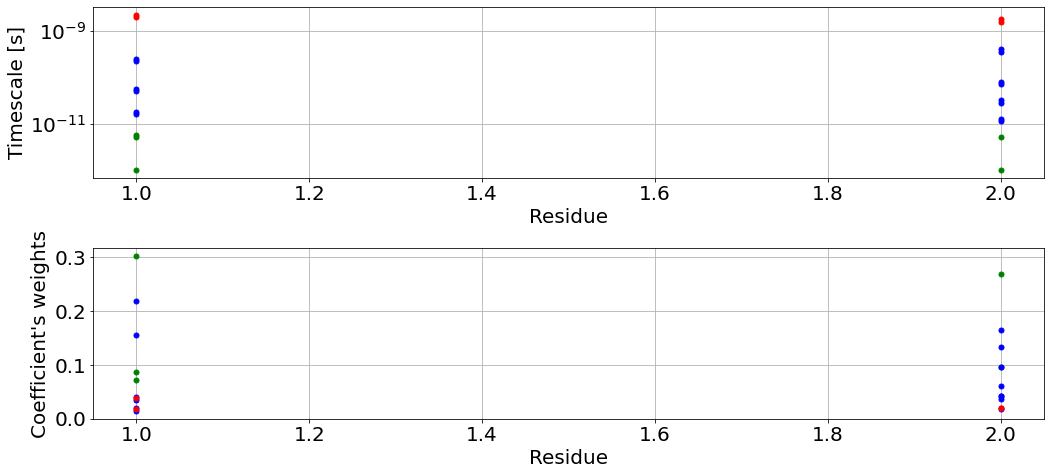

In [11]:
plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2) = plt.subplots(2)



ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("Residue")
#ax1.set_ylim([10**(-12.4), 10**(-6.8)])


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("Residue")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                     
        
plt.show()    

In [16]:
np.savetxt("50SDS_eYqjD_relax_coef.out",Ctimes_to_save)

In [17]:
pwd

'/home/local/nenciric/Documents/git/CorysPeptides/calculate_relax_from_SDS_proteins'